### Introduction
#### Create a machine learning model to predict if the policyholder will file a claim in the next 6 months or not based on the set of car and policy features.

### Import the necessary packages

In [1]:
!pip install klib -q

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # visualization
from matplotlib import pyplot as plt # visualization
#import klib
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import re


from scipy.stats import skew, kurtosis
from prettytable import PrettyTable

### Import train and test dataset

In [3]:
train=pd.read_csv("../input/av-insurance-claim-pediction-dataverse-2022/train.csv")
test=pd.read_csv("../input/av-insurance-claim-pediction-dataverse-2022/test.csv")

### Structure of the train and test dataset

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58592 entries, 0 to 58591
Data columns (total 44 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   policy_id                         58592 non-null  object 
 1   policy_tenure                     58592 non-null  float64
 2   age_of_car                        58592 non-null  float64
 3   age_of_policyholder               58592 non-null  float64
 4   area_cluster                      58592 non-null  object 
 5   population_density                58592 non-null  int64  
 6   make                              58592 non-null  int64  
 7   segment                           58592 non-null  object 
 8   model                             58592 non-null  object 
 9   fuel_type                         58592 non-null  object 
 10  max_torque                        58592 non-null  object 
 11  max_power                         58592 non-null  object 
 12  engi

#### The above information shows that there are 58592 data entries and 44 columns.

In [8]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39063 entries, 0 to 39062
Data columns (total 43 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   policy_id                         39063 non-null  object 
 1   policy_tenure                     39063 non-null  float64
 2   age_of_car                        39063 non-null  float64
 3   age_of_policyholder               39063 non-null  float64
 4   area_cluster                      39063 non-null  object 
 5   population_density                39063 non-null  int64  
 6   make                              39063 non-null  int64  
 7   segment                           39063 non-null  object 
 8   model                             39063 non-null  object 
 9   fuel_type                         39063 non-null  object 
 10  max_torque                        39063 non-null  object 
 11  max_power                         39063 non-null  object 
 12  engi

#### The above information shows that there are 39063 data entries and 43 columns.

### Let's see is there any missing values in train and test dataset by column wise.

In [9]:
train.isnull().sum()

policy_id                           0
policy_tenure                       0
age_of_car                          0
age_of_policyholder                 0
area_cluster                        0
population_density                  0
make                                0
segment                             0
model                               0
fuel_type                           0
max_torque                          0
max_power                           0
engine_type                         0
airbags                             0
is_esc                              0
is_adjustable_steering              0
is_tpms                             0
is_parking_sensors                  0
is_parking_camera                   0
rear_brakes_type                    0
displacement                        0
cylinder                            0
transmission_type                   0
gear_box                            0
steering_type                       0
turning_radius                      0
length      

#### The above information shows that there are no missing values.

In [10]:
test.isnull().sum()

policy_id                           0
policy_tenure                       0
age_of_car                          0
age_of_policyholder                 0
area_cluster                        0
population_density                  0
make                                0
segment                             0
model                               0
fuel_type                           0
max_torque                          0
max_power                           0
engine_type                         0
airbags                             0
is_esc                              0
is_adjustable_steering              0
is_tpms                             0
is_parking_sensors                  0
is_parking_camera                   0
rear_brakes_type                    0
displacement                        0
cylinder                            0
transmission_type                   0
gear_box                            0
steering_type                       0
turning_radius                      0
length      

### The above information shows that there are no missing values.

### Let's see the glimpse of train dataset

In [11]:
train.head(2)

policy_id  policy_tenure  age_of_car  age_of_policyholder area_cluster  \
0   ID00001       0.515874        0.05             0.644231           C1   
1   ID00002       0.672619        0.02             0.375000           C2   

   population_density  make segment model fuel_type  ... is_brake_assist  \
0                4990     1       A    M1       CNG  ...              No   
1               27003     1       A    M1       CNG  ...              No   

  is_power_door_locks is_central_locking  is_power_steering  \
0                  No                 No                Yes   
1                  No                 No                Yes   

  is_driver_seat_height_adjustable is_day_night_rear_view_mirror is_ecw  \
0                               No                            No     No   
1                               No                            No     No   

  is_speed_alert ncap_rating is_claim  
0            Yes           0        0  
1            Yes           0        0  

[2 rows x 44 columns]

### Let's create a function to display the catgeorical column level counts.

In [5]:
def count_plot(df,col,rot=None,switchax=None,size=(8,6),title=''):
    _=plt.figure(figsize=size)
    if switchax:
        _=sns.countplot(y=df[col],order=df[col].value_counts().index);
        _=plt.title(title,fontsize=25)
        _=plt.ylabel(col,fontsize=20)
        _=plt.yticks(fontsize=14,rotation=rot)   

    else:
        _=sns.countplot(x=df[col],order=df[col].value_counts().index);
        _=plt.title(title,fontsize=25)
        _=plt.xlabel(col,fontsize=20)
        _=plt.xticks(fontsize=14,rotation=rot)   

### Let's create a function for side by side plot(density and group-wise boxplot).

In [8]:
def side_by_side_plot(df,grp,valcol,rot=None,size=(15,8)):
    clr="Paired"
    fig,(ax1,ax2) = plt.subplots(1,2,figsize=size)
    fig.tight_layout()
    sns.kdeplot(x=df[valcol], hue=df[grp],ax=ax1,palette=clr)
    ax1.set_title(grp.capitalize()+" Wise "+valcol.capitalize()+" Distribution",size=15)
    ax1.set_xlabel(valcol,fontsize=20)
    sns.boxplot(x=df[grp],y=df[valcol],ax=ax2,palette=clr)
    ax2.set_title(grp.capitalize()+" Wise "+valcol.capitalize()+" Distribution",size=15)
    ax2.set_xlabel(grp,fontsize=20)
    ax2.tick_params(rotation=rot)

### Let's see the target column(outcome) distribution.

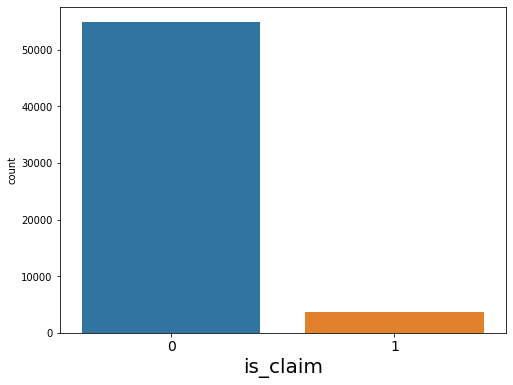

In [10]:
count_plot(train,'is_claim')

In [19]:
train['is_claim'].value_counts()

0    54844
1     3748
Name: is_claim, dtype: int64

####  The above plot and summary explain that there is an imbalance between the classes.

### Let's see the categorical columns distribution.There are 39 categorical columns.

In [12]:
categorical_columns=['area_cluster', 'population_density', 'make', 'segment', 'model',
       'fuel_type', 'max_torque', 'max_power', 'engine_type', 'airbags',
       'is_esc', 'is_adjustable_steering', 'is_tpms', 'is_parking_sensors',
       'is_parking_camera', 'rear_brakes_type', 'displacement', 'cylinder',
       'transmission_type', 'gear_box', 'steering_type', 'turning_radius',
       'length', 'width', 'height', 'gross_weight', 'is_front_fog_lights',
       'is_rear_window_wiper', 'is_rear_window_washer',
       'is_rear_window_defogger', 'is_brake_assist', 'is_power_door_locks',
       'is_central_locking', 'is_power_steering',
       'is_driver_seat_height_adjustable', 'is_day_night_rear_view_mirror',
       'is_ecw', 'is_speed_alert', 'ncap_rating']

In [41]:
for col in categorical_columns:
    print("="*100)
    print(f"Column Name: {col}")
    print(f"Number of Unique Values in {col}: {train[col].nunique()}'")
    print(f"{train[col].value_counts()}")
    print("-"*100)

Column Name: area_cluster
Number of Unique Values in area_cluster: 22'
C8     13654
C2      7342
C5      6979
C3      6101
C14     3660
C13     3423
C10     3155
C9      2734
C7      2167
C12     1589
C1      1468
C11     1212
C19      952
C6       890
C15      771
C4       665
C17      492
C16      401
C21      379
C18      242
C22      207
C20      109
Name: area_cluster, dtype: int64
----------------------------------------------------------------------------------------------------
Column Name: population_density
Number of Unique Values in population_density: 22'
8794     13654
27003     7342
34738     6979
4076      6101
7788      3660
5410      3423
73430     3155
17804     2734
6112      2167
34791     1589
4990      1468
6108      1212
27742      952
13051      890
290        771
21622      665
65567      492
16206      401
3264       379
35036      242
16733      207
20905      109
Name: population_density, dtype: int64
---------------------------------------------------------

#### For a better visualization let's see split the 39 categorical columns by 10.

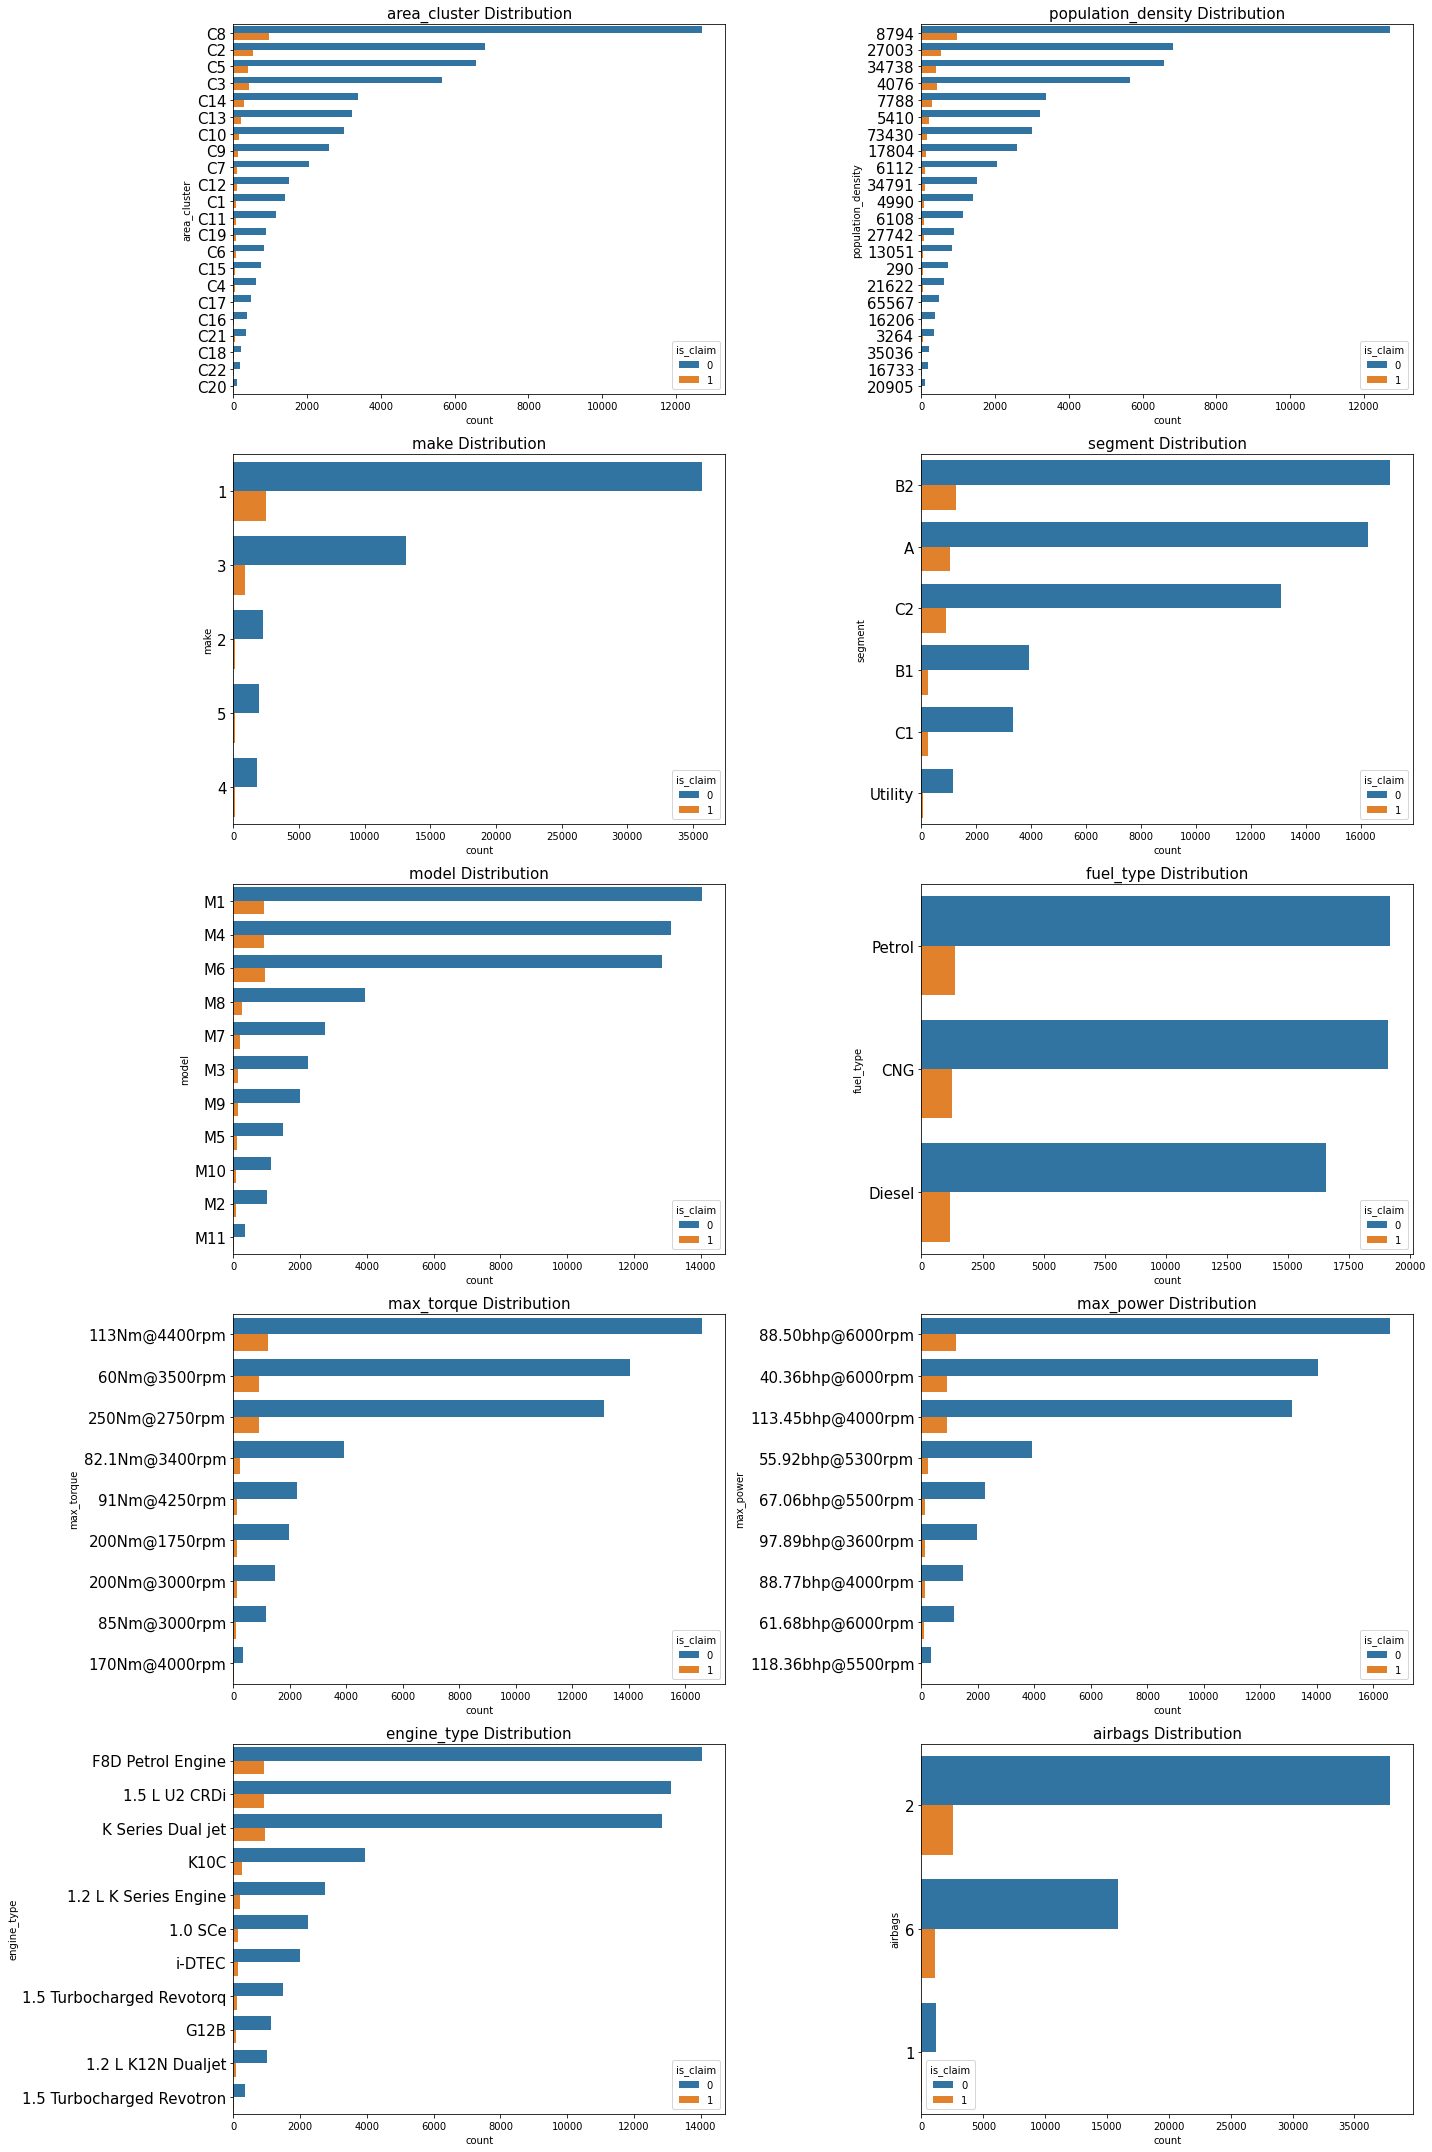

In [13]:
fig=plt.subplots(figsize=(20,30))
for i,col  in enumerate(categorical_columns[:10]):
    _=plt.subplot(5,2,i+1)
    _=sns.countplot(y=train[col],hue=train['is_claim'],order=train[col].value_counts().index)
    _=plt.title(col+' Distribution',fontsize=15)
    _=plt.ylabel(col,fontsize=10)
    _=plt.yticks(fontsize=15)
    _=plt.tight_layout()  
plt.show() 

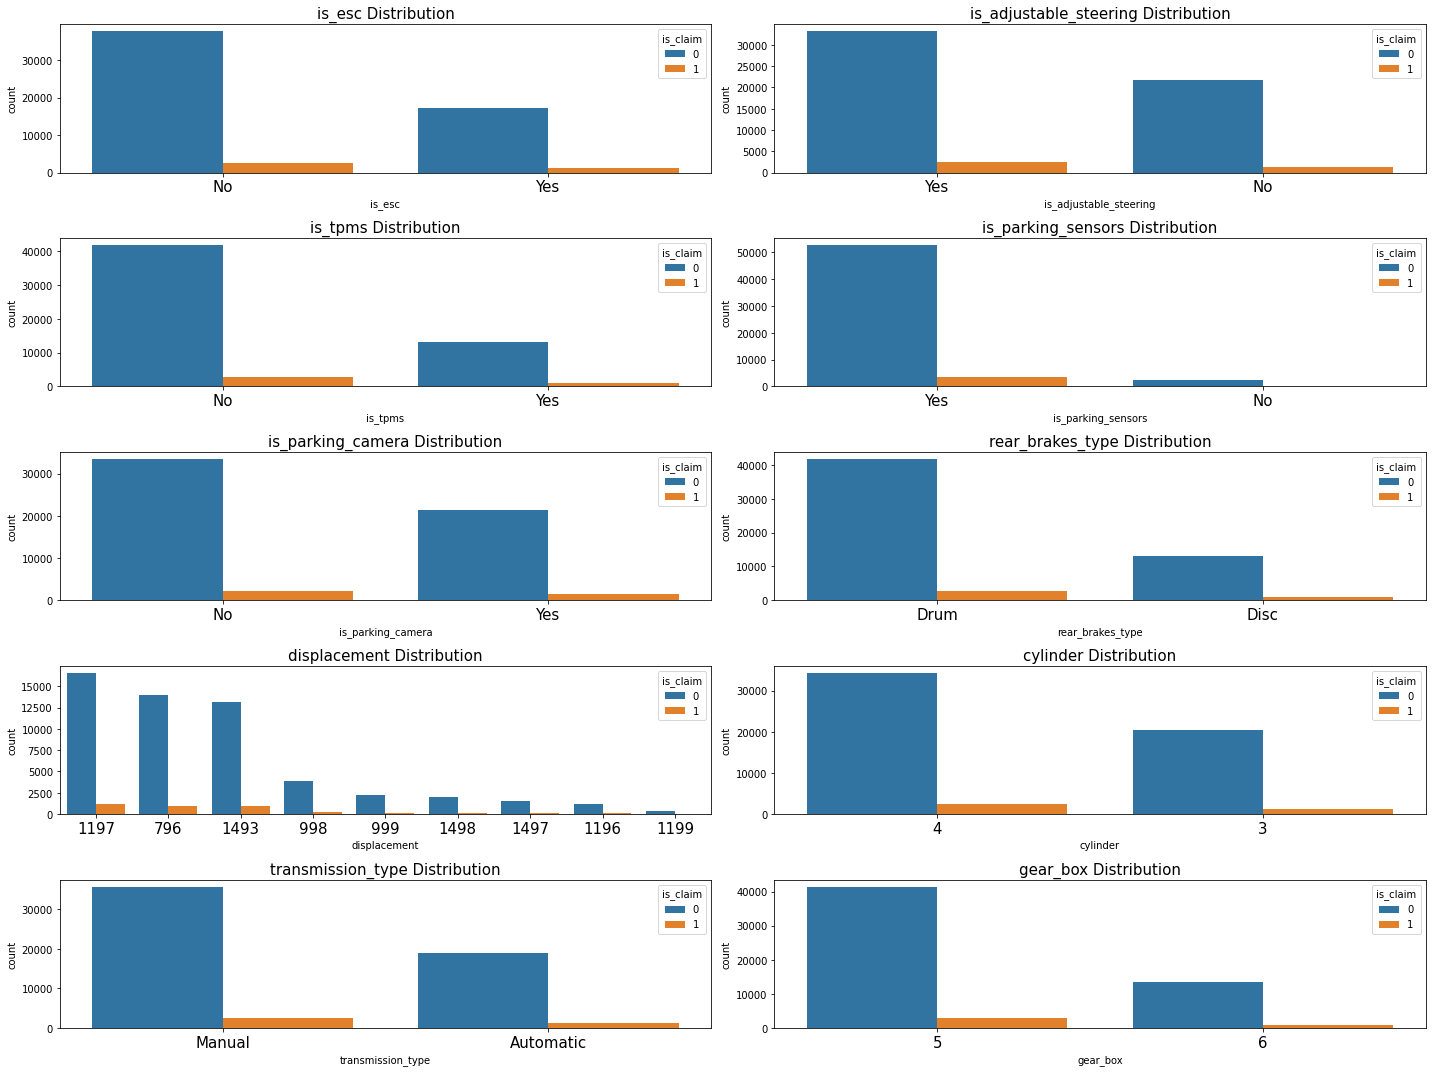

In [14]:
fig=plt.subplots(figsize=(20,15))
for i,col  in enumerate(categorical_columns[10:20]):
    _=plt.subplot(5,2,i+1)
    _=sns.countplot(x=train[col],hue=train['is_claim'],order=train[col].value_counts().index)
    _=plt.title(col+' Distribution',fontsize=15)
    _=plt.xlabel(col,fontsize=10)
    _=plt.xticks(fontsize=15)
    _=plt.tight_layout()  
plt.show() 

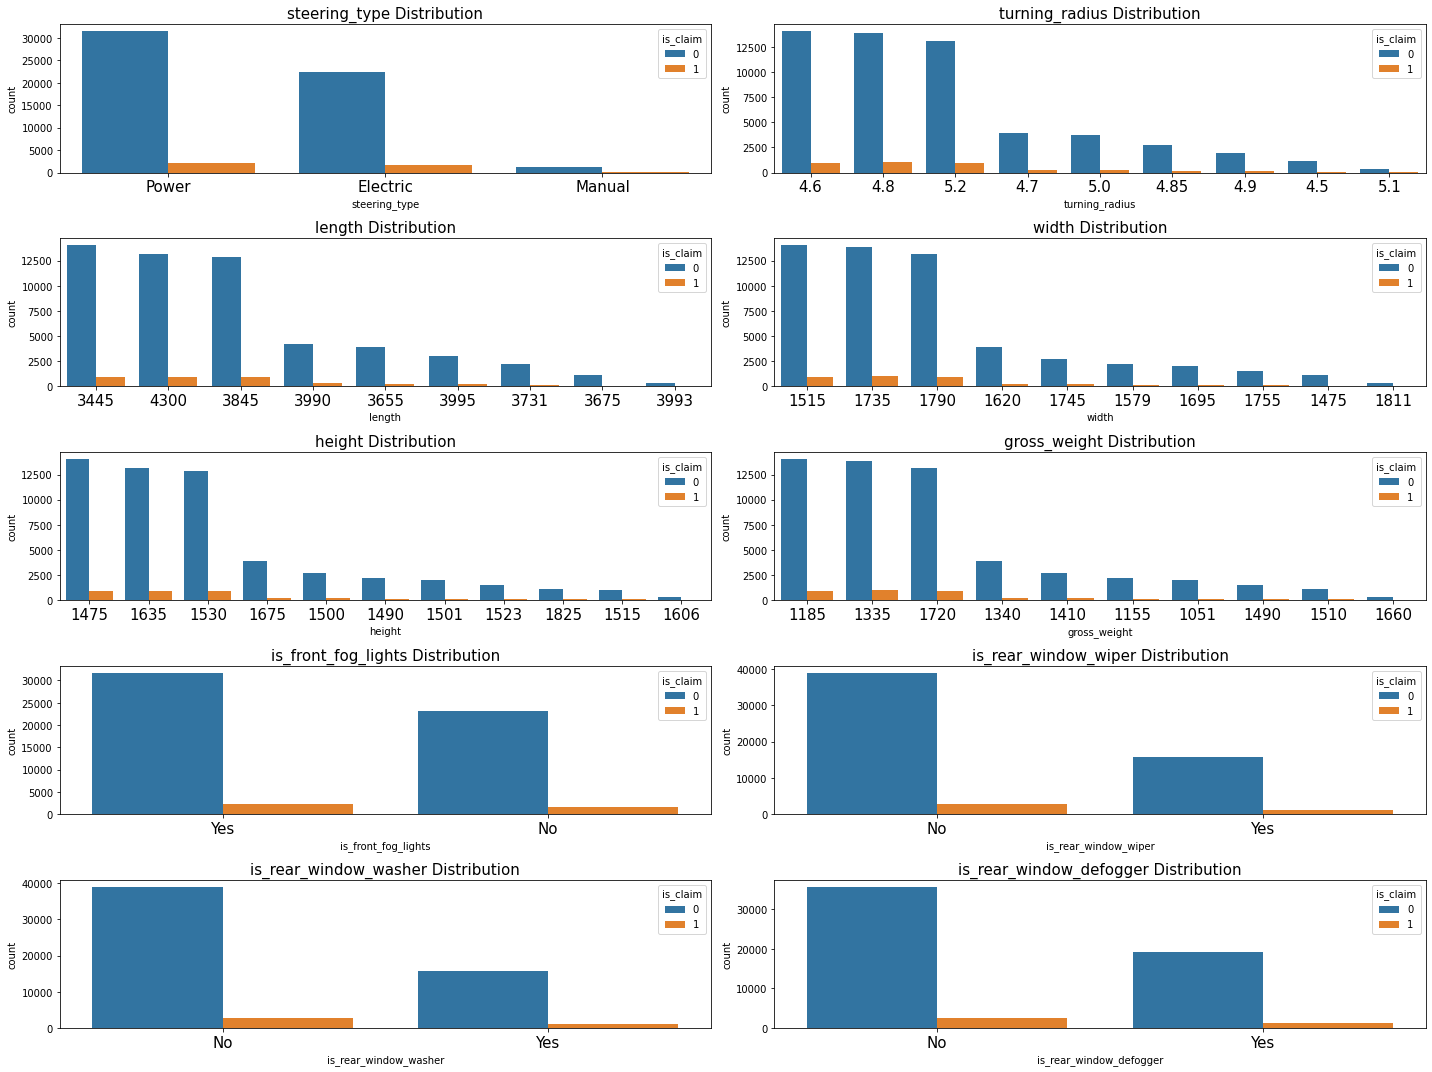

In [15]:
fig=plt.subplots(figsize=(20,15))
for i,col  in enumerate(categorical_columns[20:30]):
    _=plt.subplot(5,2,i+1)
    _=sns.countplot(x=train[col],hue=train['is_claim'],order=train[col].value_counts().index)
    _=plt.title(col+' Distribution',fontsize=15)
    _=plt.xlabel(col,fontsize=10)
    _=plt.xticks(fontsize=15)
    _=plt.tight_layout()  
plt.show() 

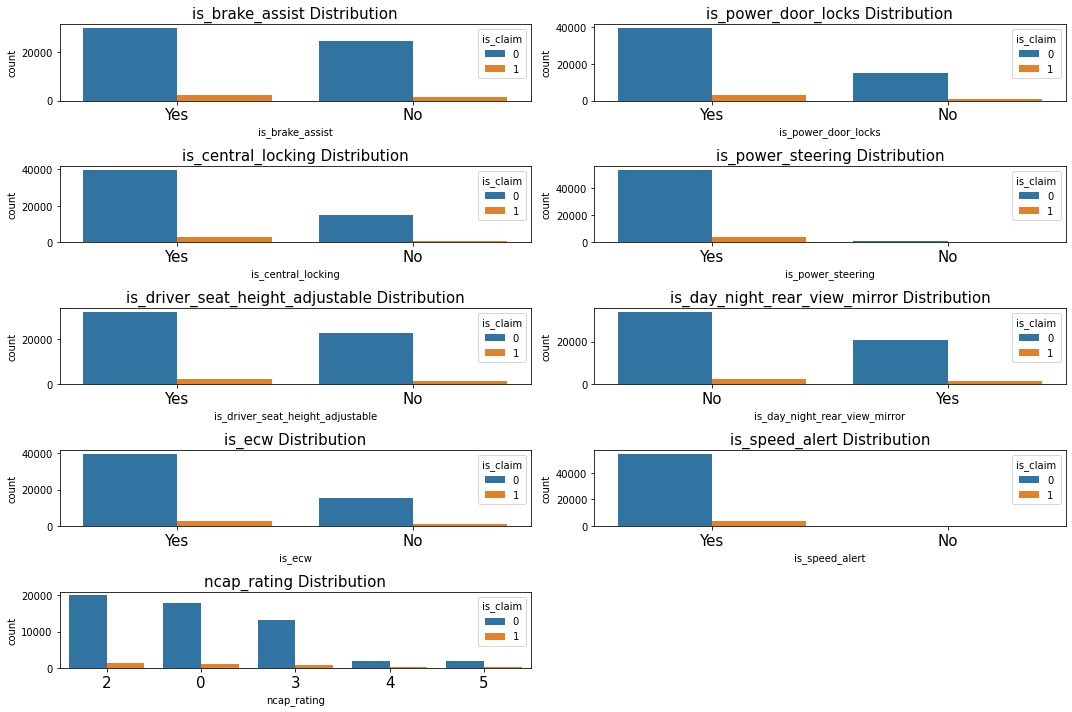

In [17]:
fig=plt.subplots(figsize=(15,10))
for i,col  in enumerate(categorical_columns[30:]):
    _=plt.subplot(5,2,i+1)
    _=sns.countplot(x=train[col],hue=train['is_claim'],order=train[col].value_counts().index)
    _=plt.title(col+' Distribution',fontsize=15)
    _=plt.xlabel(col,fontsize=10)
    _=plt.xticks(fontsize=15)
    _=plt.tight_layout()  
plt.show() 

### Let's see the numerical columns distribution by using box plot.

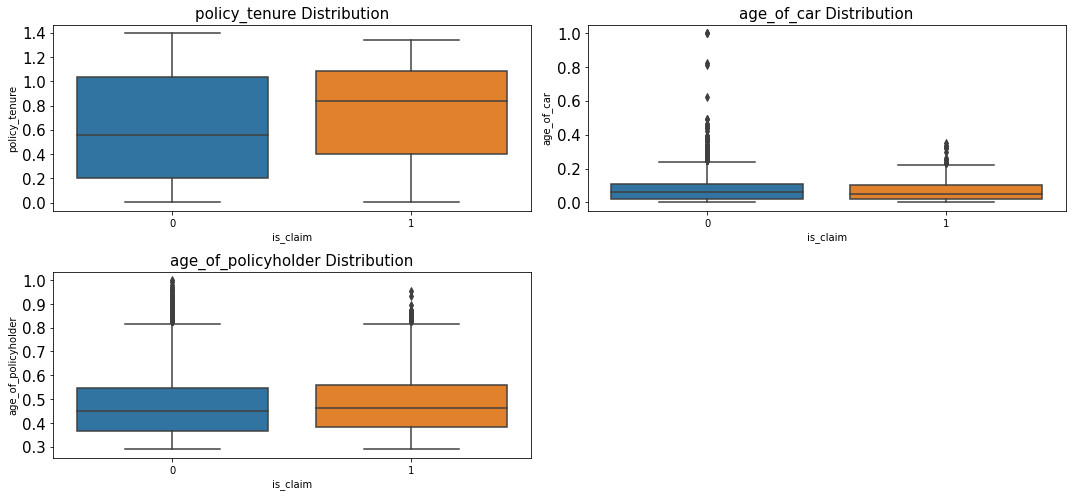

In [42]:
fig=plt.subplots(figsize=(15, 10))
for i,col  in enumerate( ['policy_tenure', 'age_of_car', 'age_of_policyholder']):
    _=plt.subplot(3,2,i+1)
    _=sns.boxplot(x=train['is_claim'],y=train[col])
    _=plt.title(col+' Distribution',fontsize=15)
    _=plt.ylabel(col,fontsize=10)
    _=plt.yticks(fontsize=15)
    _=plt.tight_layout()  
plt.show() 

In [79]:
box_plot_summary = PrettyTable([i.capitalize() for i in['name', 'min', 'Q1-25%', 'Q2(Median)50%', 'Q3-75%', 'max','iqr','lower limit','upper limit','outlier']])
box_plot_summary.align["Name"] = "l"
for num, col  in enumerate(['policy_tenure', 'age_of_car', 'age_of_policyholder']):
    d=list()
    d.append(f"{num+1}.{col.capitalize()}")
    d.append(round(train[col].describe()[3],3))
    d.append(round(train[col].describe()[4],3))
    d.append(round(train[col].describe()[5],3))
    d.append(round(train[col].describe()[6],3))
    d.append(round(train[col].describe()[7],3))
    d.append(round(train[col].describe()[6]-train[col].describe()[4],3))
    low_limit=round(train[col].describe()[4]-1.5*(train[col].describe()[6]-train[col].describe()[4]),3)
    up_limit=round(train[col].describe()[6]+1.5*(train[col].describe()[6]-train[col].describe()[4]),3)
    d.append(low_limit)
    d.append(low_limit)
    d.append(any([(any(i < low_limit for i in train[col].values)), (any(i > up_limit for i in train[col].values))]))
    
    box_plot_summary.add_row(d)

box_plot_summary

+-----------------------+-------+--------+---------------+--------+-------+-------+-------------+-------------+---------+
| Name                  |  Min  | Q1-25% | Q2(median)50% | Q3-75% |  Max  |  Iqr  | Lower limit | Upper limit | Outlier |
+-----------------------+-------+--------+---------------+--------+-------+-------+-------------+-------------+---------+
| 1.Policy_tenure       | 0.003 |  0.21  |     0.574     | 1.039  | 1.397 | 0.829 |    -1.033   |    -1.033   |  False  |
| 2.Age_of_car          |  0.0  |  0.02  |      0.06     |  0.11  |  1.0  |  0.09 |    -0.115   |    -0.115   |   True  |
| 3.Age_of_policyholder | 0.288 | 0.365  |     0.452     | 0.548  |  1.0  | 0.183 |    0.091    |    0.091    |   True  |
+-----------------------+-------+--------+---------------+--------+-------+-------+-------------+-------------+---------+

#### The above plot and summary explains that there are outliers in the columns age_of_car and age_of_policyholder.

### Let's see the numerical columns distribution by using kernel distribution plot.

In [45]:
for col in ['policy_tenure', 'age_of_car', 'age_of_policyholder']:
    print("="*100)
    print(f"Column Name: {col}")
    print(f"Number of Unique Values in {col}: {train[col].nunique()}")
    print(f"{train[col].describe()}")
    print("-"*100)

Column Name: policy_tenure
Number of Unique Values in policy_tenure: 58592
count    58592.000000
mean         0.611246
std          0.414156
min          0.002735
25%          0.210250
50%          0.573792
75%          1.039104
max          1.396641
Name: policy_tenure, dtype: float64
----------------------------------------------------------------------------------------------------
Column Name: age_of_car
Number of Unique Values in age_of_car: 49
count    58592.000000
mean         0.069424
std          0.056721
min          0.000000
25%          0.020000
50%          0.060000
75%          0.110000
max          1.000000
Name: age_of_car, dtype: float64
----------------------------------------------------------------------------------------------------
Column Name: age_of_policyholder
Number of Unique Values in age_of_policyholder: 75
count    58592.000000
mean         0.469420
std          0.122886
min          0.288462
25%          0.365385
50%          0.451923
75%          0.54807

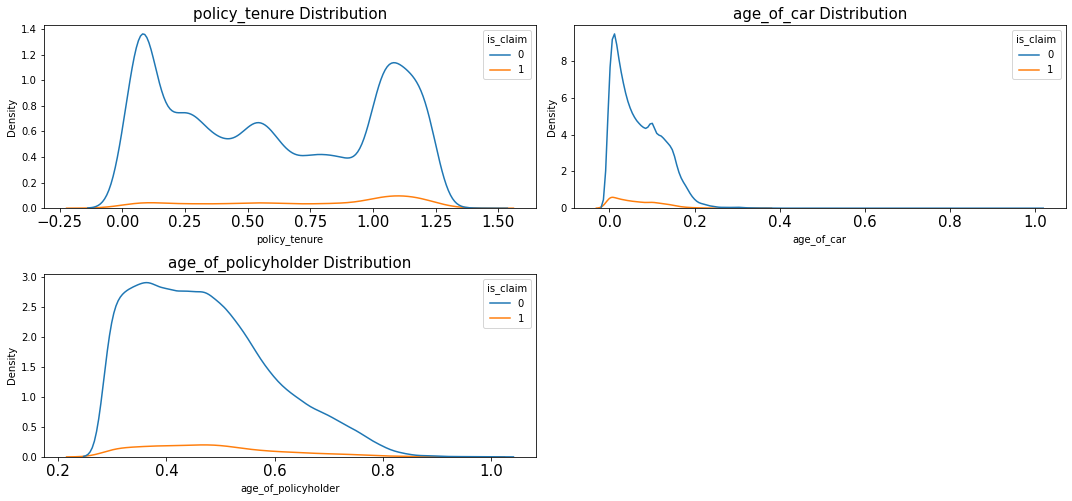

In [74]:
fig=plt.subplots(figsize=(15, 10))
for i,col  in enumerate( ['policy_tenure', 'age_of_car', 'age_of_policyholder']):
    _=plt.subplot(3,2,i+1)
    _=sns.kdeplot(x=train[col],hue=train['is_claim'])
    _=plt.title(col+' Distribution',fontsize=15)
    _=plt.xlabel(col,fontsize=10)
    _=plt.xticks(fontsize=15)
    _=plt.tight_layout()  
plt.show()  

In [76]:
kde_plot_summary = PrettyTable([i.capitalize() for i in['name','skew','kurtosis','mean','median','mean>median']])
kde_plot_summary.align['Name']="l"
for field in ['skew','kurtosis','mean','median']:
    kde_plot_summary.align[field]="r"
    


for num, col  in enumerate(['policy_tenure', 'age_of_car', 'age_of_policyholder']):
    d=list()
    d.append(f"{num+1}.{col.capitalize()}")

    d.append(round(skew(train[col], axis=0, bias=True),3))
    d.append(round(kurtosis(train[col], axis=0, bias=True),3))
    d.append(round(train[col].describe()[1],3))
    d.append(round(train[col].describe()[6],3))
    d.append(train[col].describe()[1]>train[col].describe()[6])
    kde_plot_summary.add_row(d)

kde_plot_summary

+-----------------------+-------+----------+-------+--------+-------------+
| Name                  |  Skew | Kurtosis |  Mean | Median | Mean>median |
+-----------------------+-------+----------+-------+--------+-------------+
| 1.Policy_tenure       | 0.054 |  -1.498  | 0.611 | 1.039  |    False    |
| 2.Age_of_car          | 1.094 |  5.301   | 0.069 |  0.11  |    False    |
| 3.Age_of_policyholder |  0.64 |  -0.157  | 0.469 | 0.548  |    False    |
+-----------------------+-------+----------+-------+--------+-------------+

#### The above plot and summary explains that the numerical columns are positively skewed.

### Let's see the policy_tenure distribution by all the categorical columns.

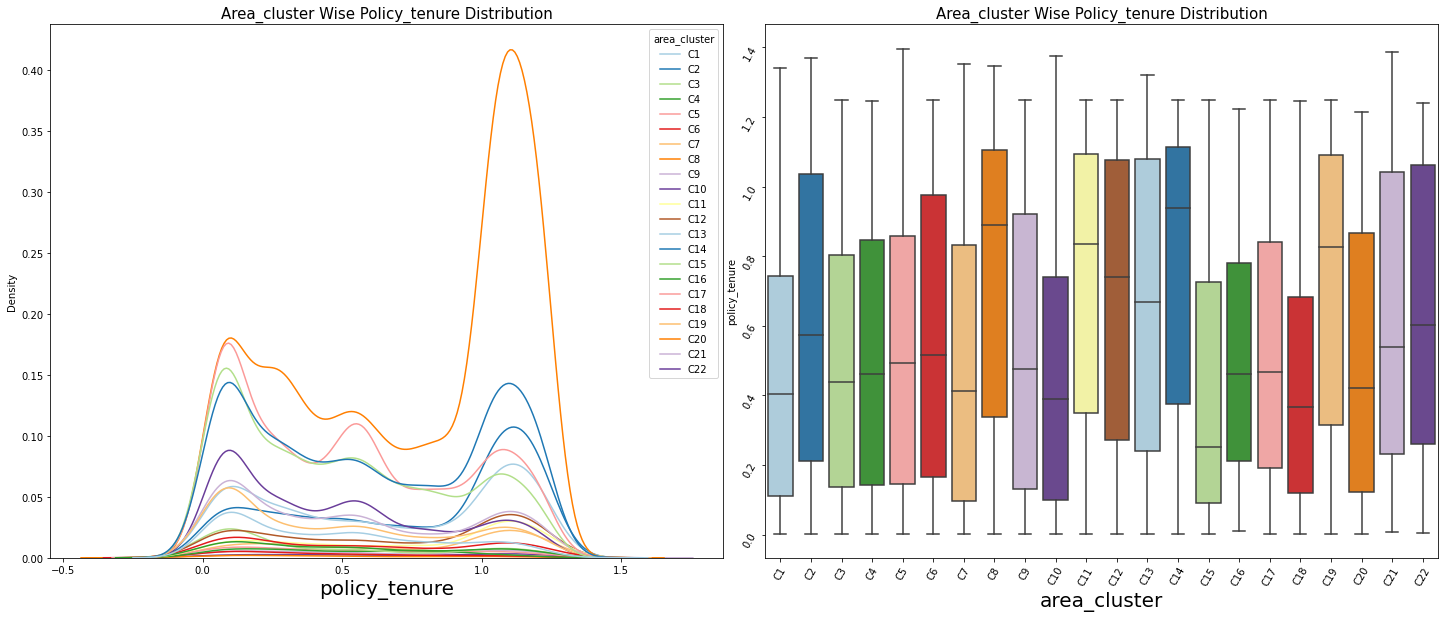

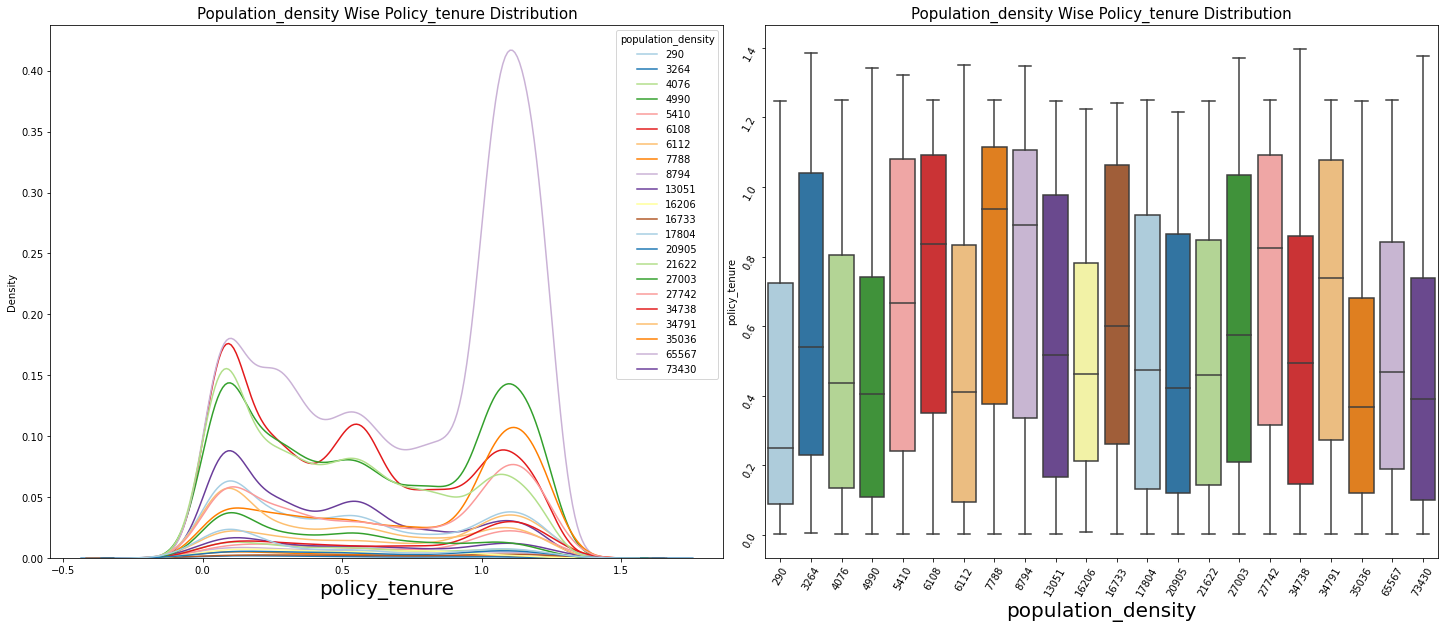

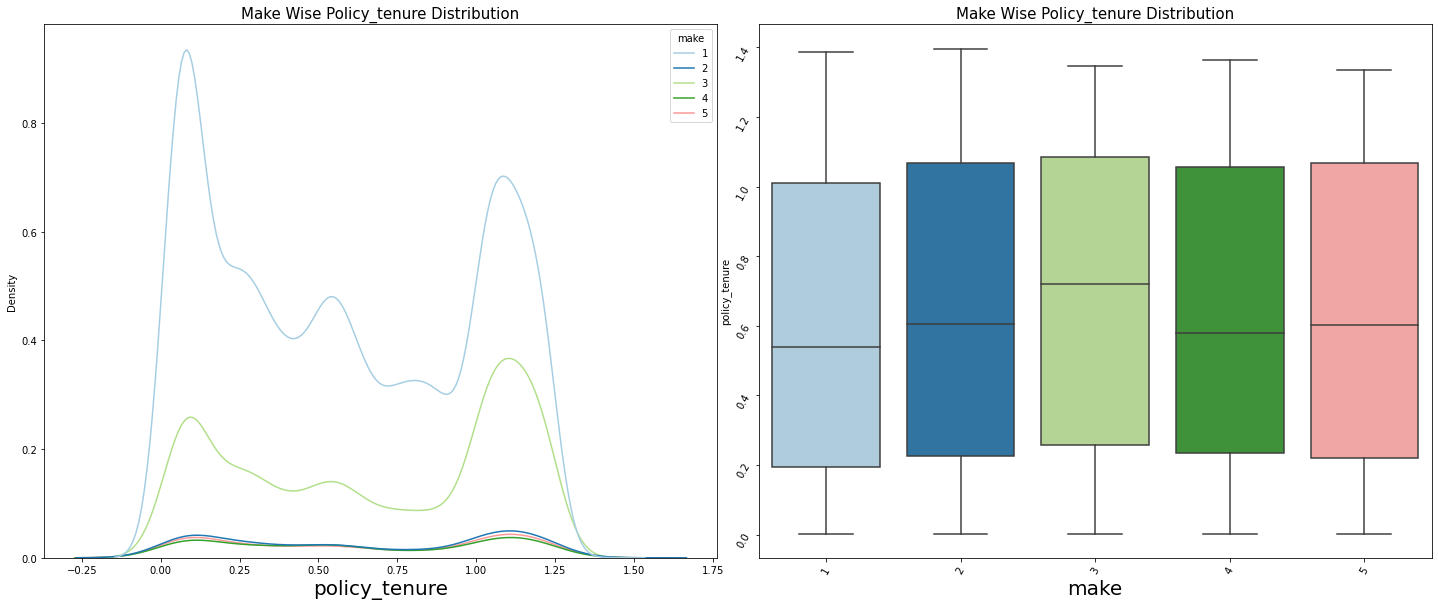

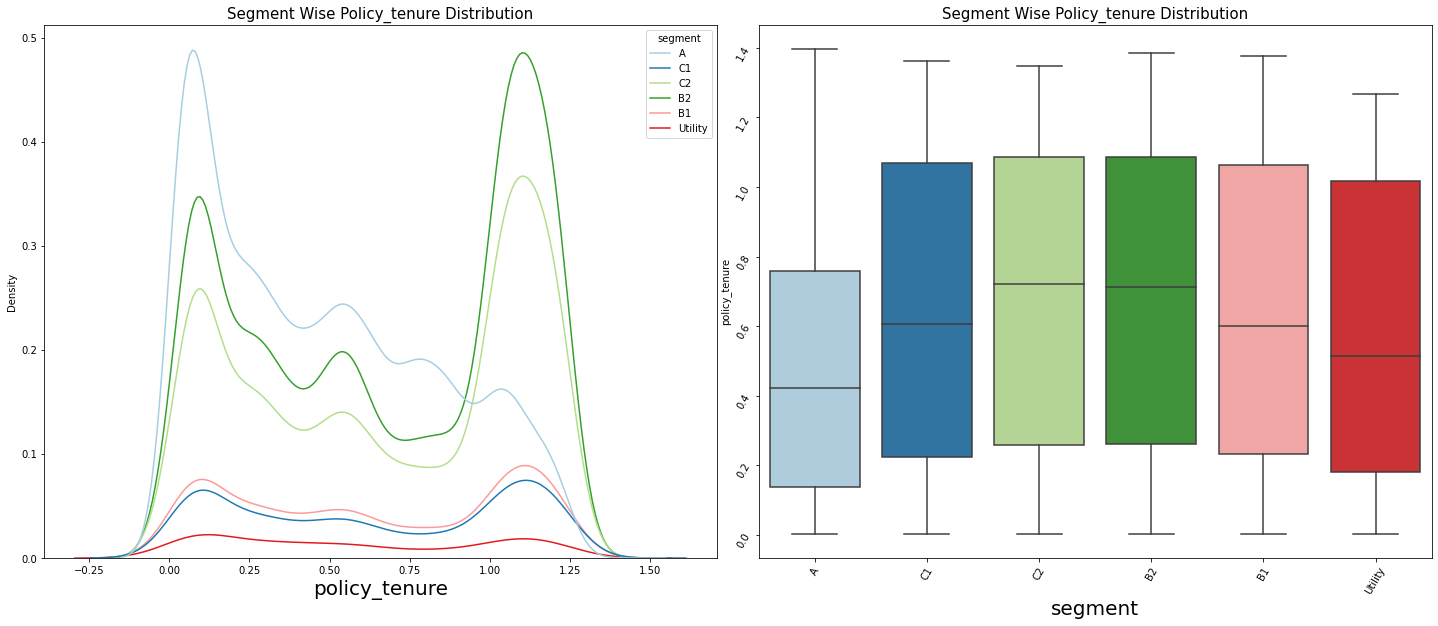

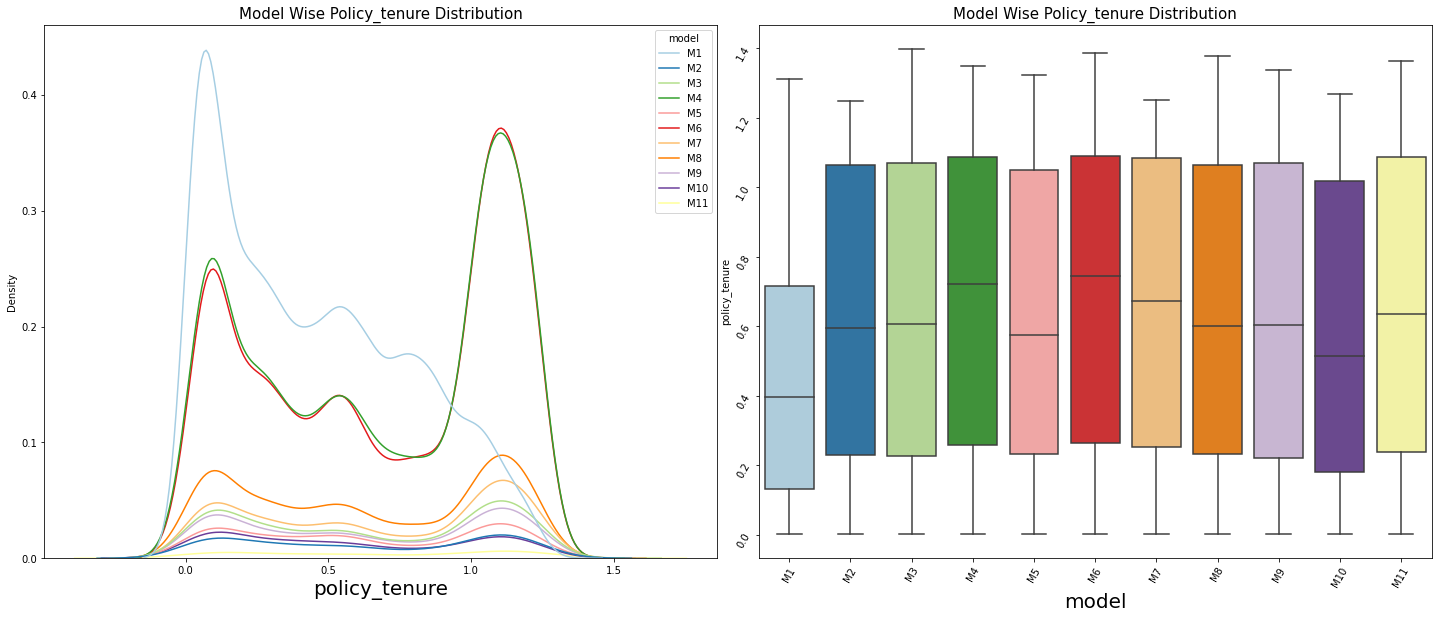

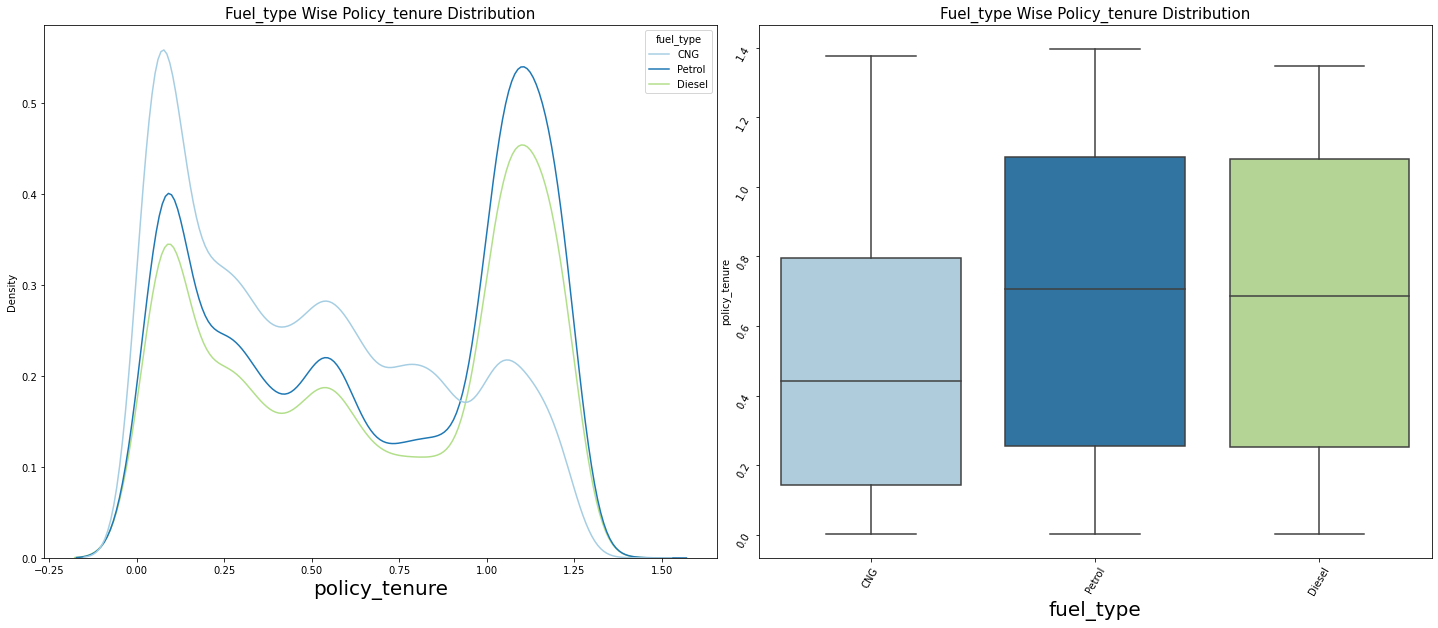

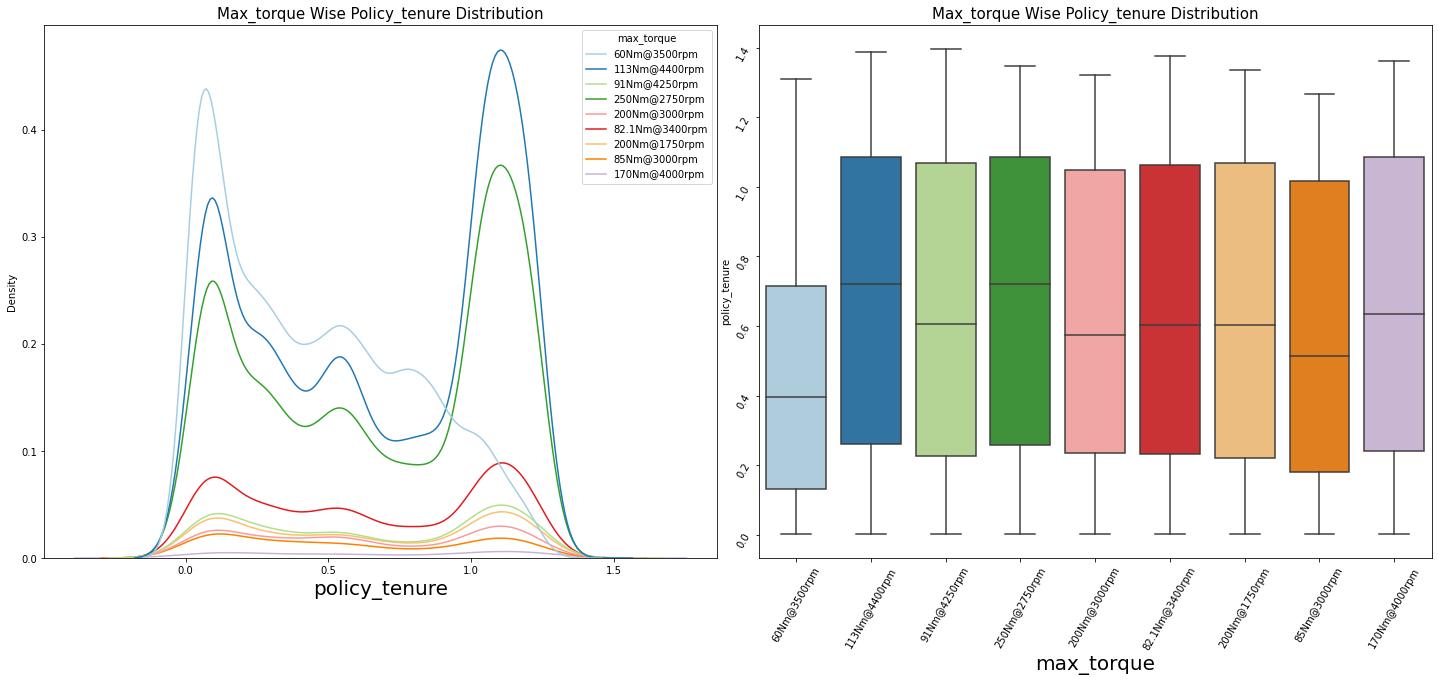

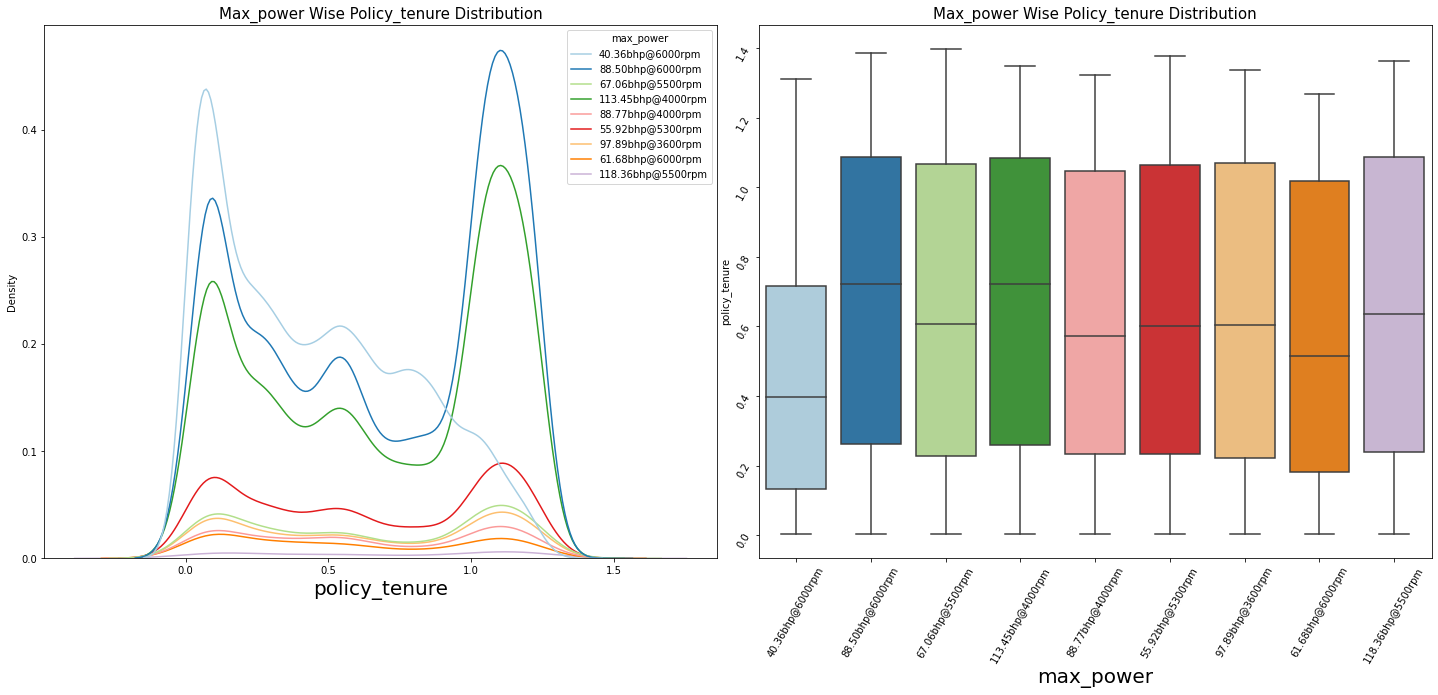

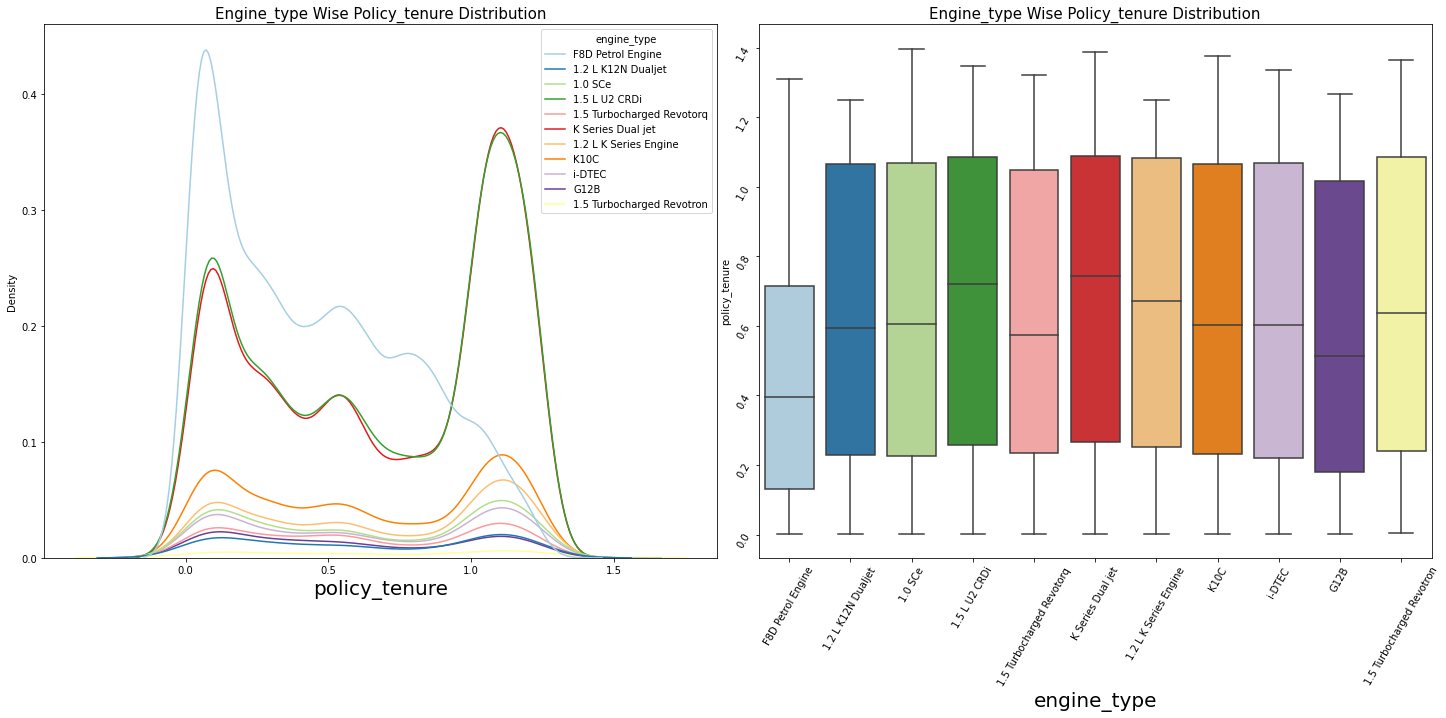

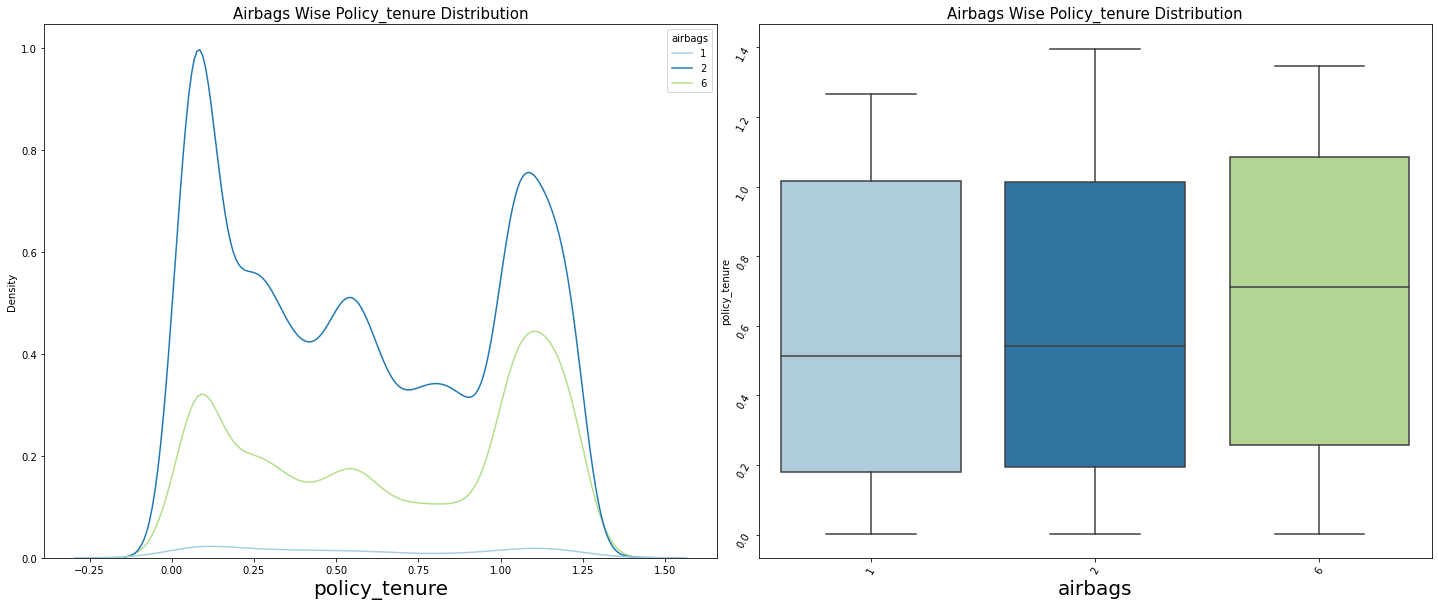

In [19]:
for i,col  in enumerate(categorical_columns[:10]): 
    _=side_by_side_plot(train,col,'policy_tenure',rot=60,size=(20,8))

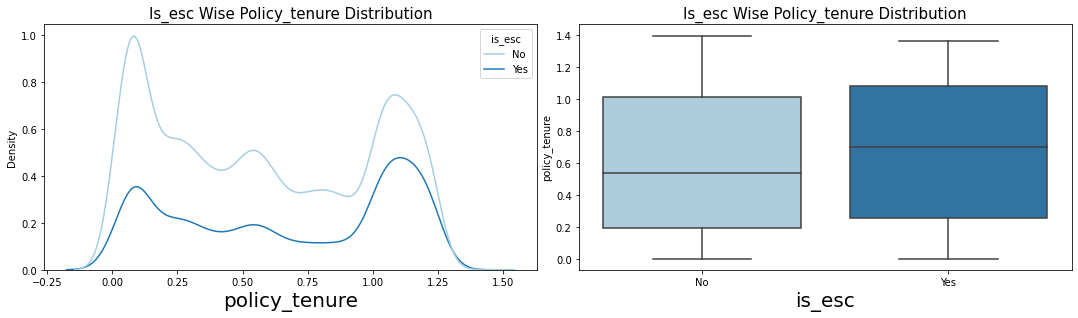

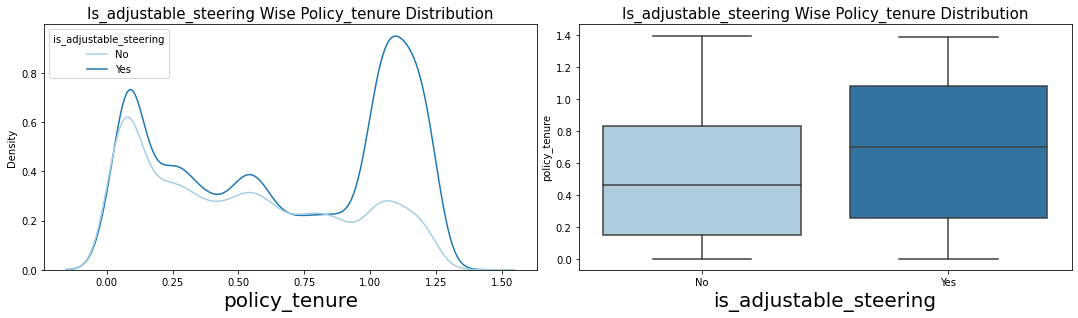

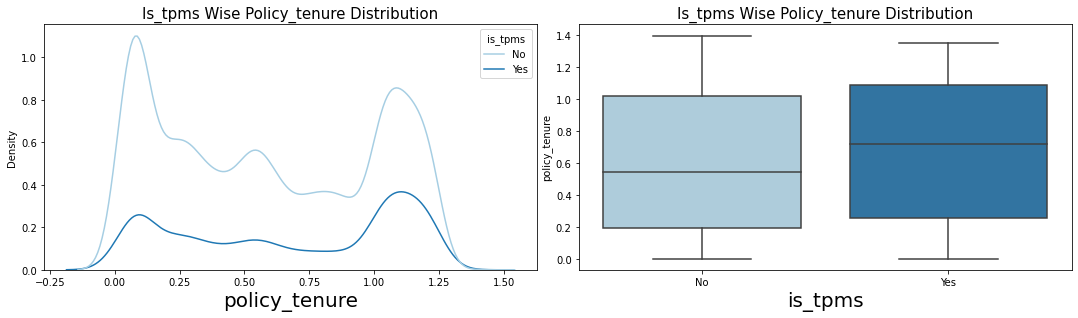

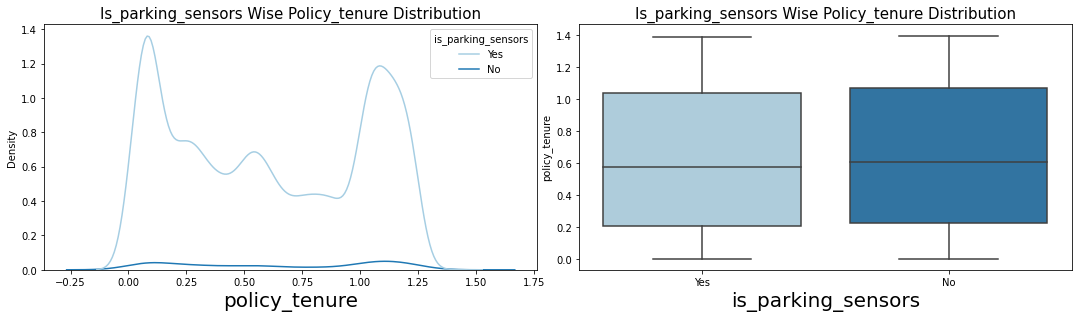

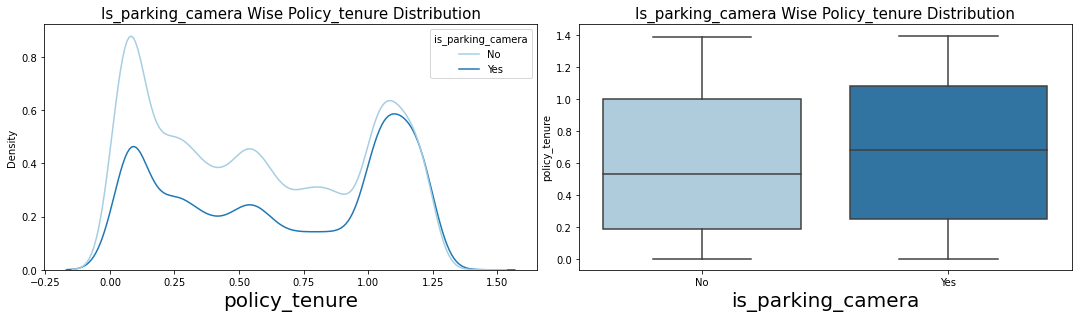

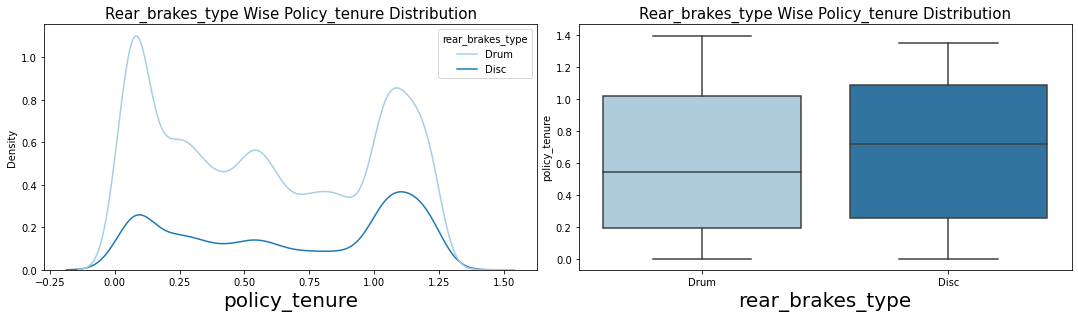

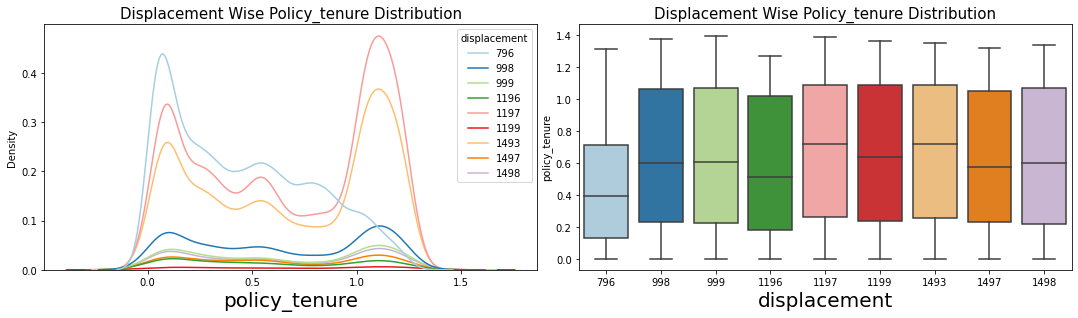

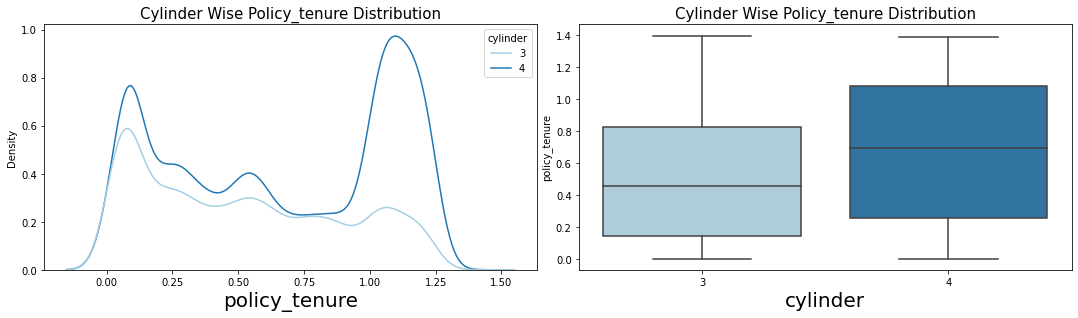

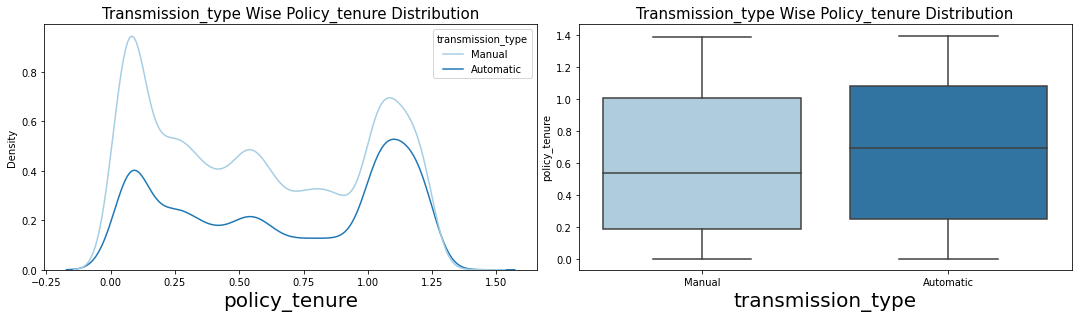

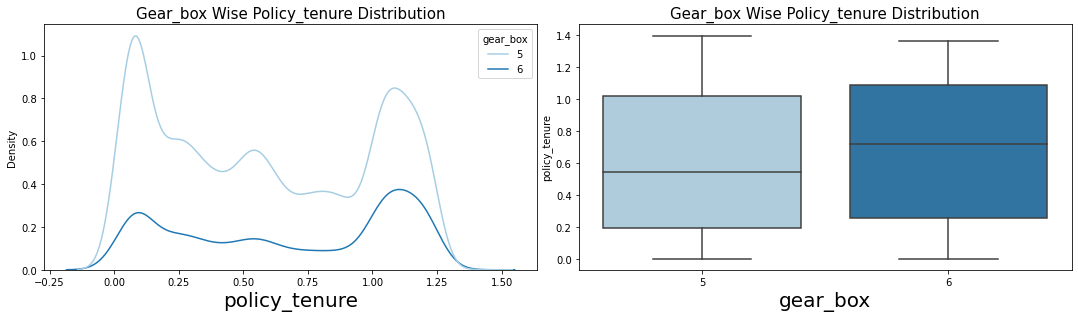

In [22]:
for i,col  in enumerate(categorical_columns[10:20]): 
    _=side_by_side_plot(train,col,'policy_tenure',size=(15,4))

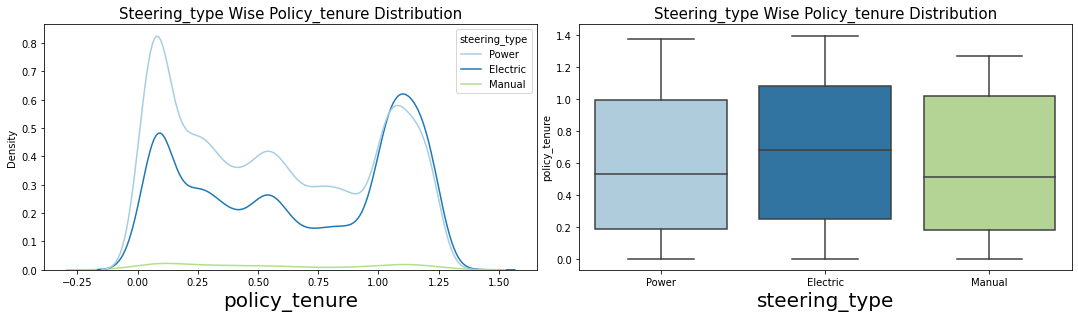

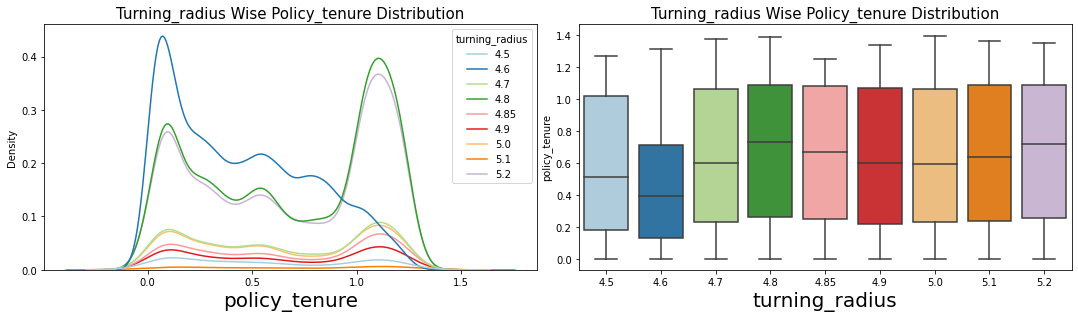

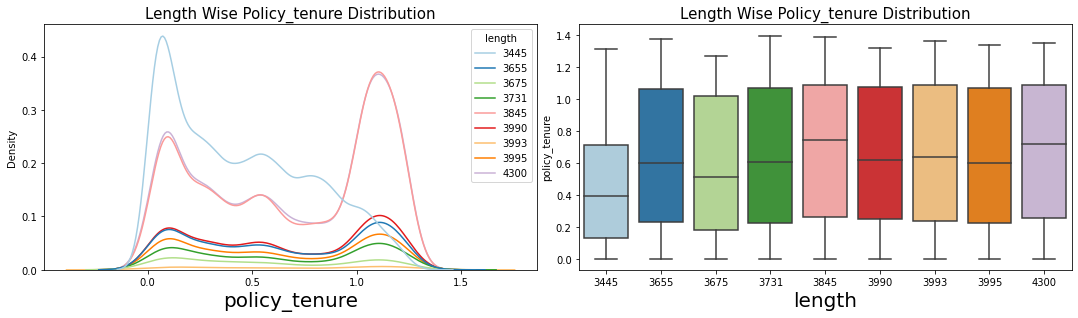

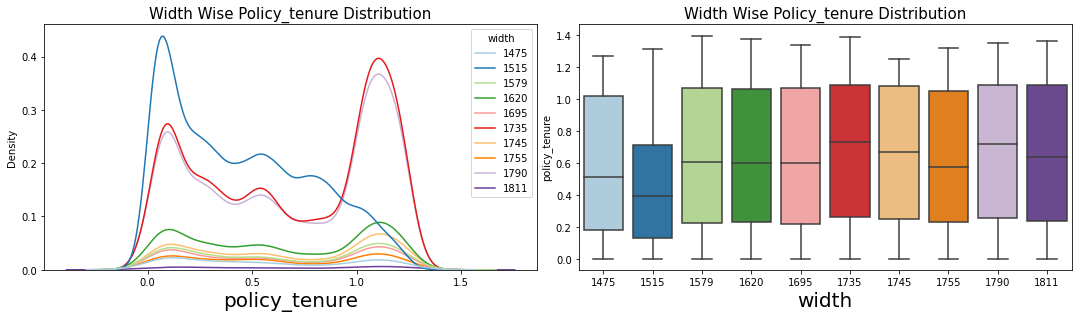

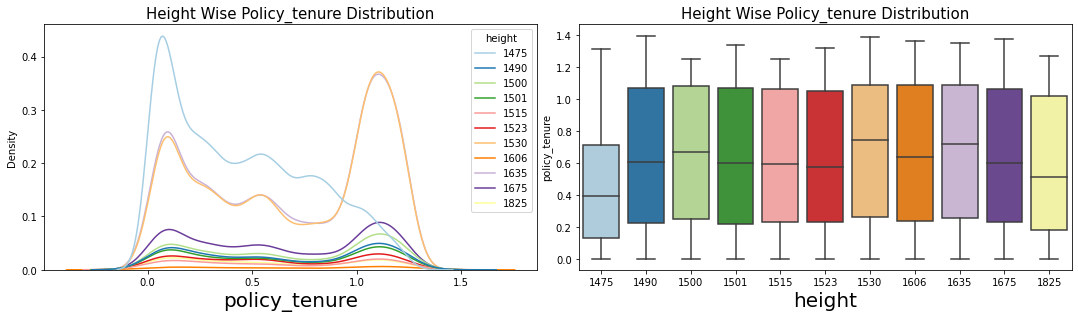

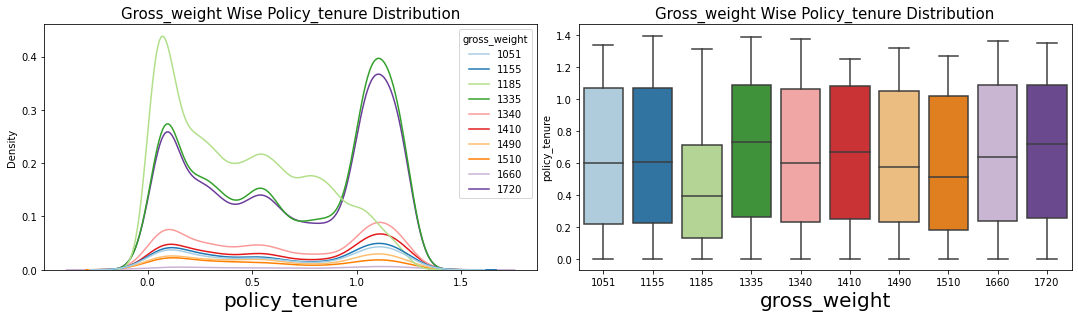

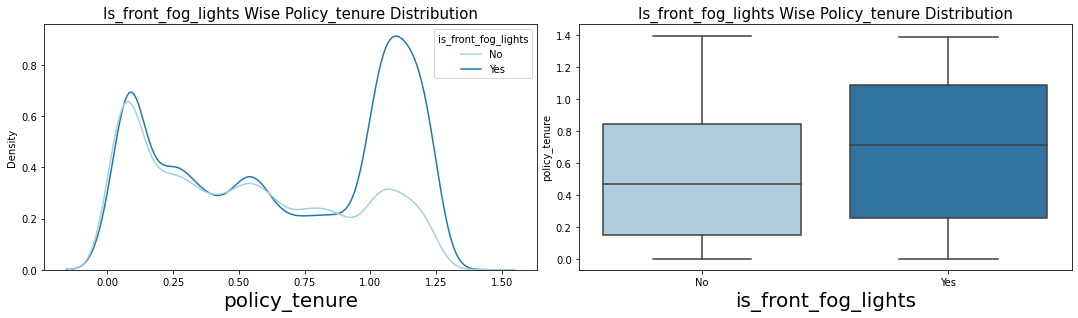

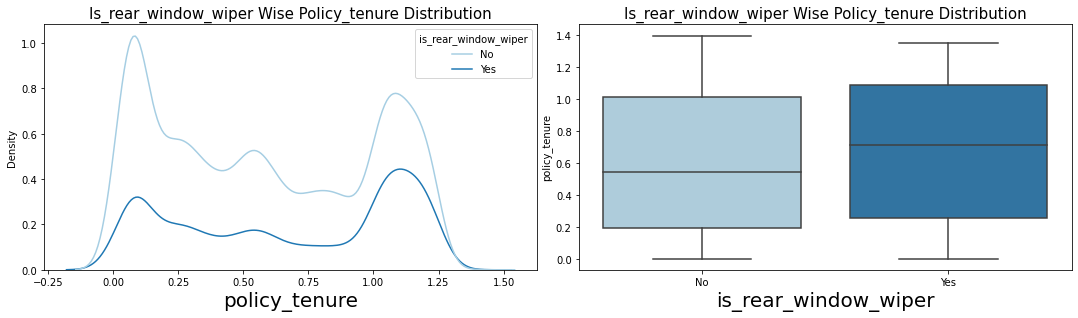

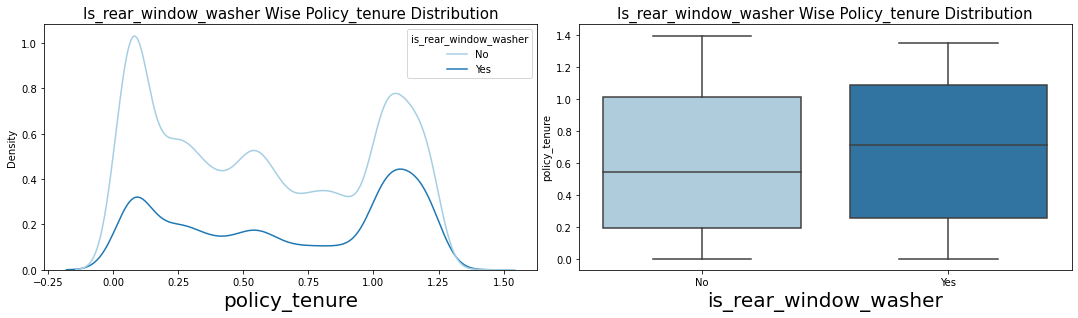

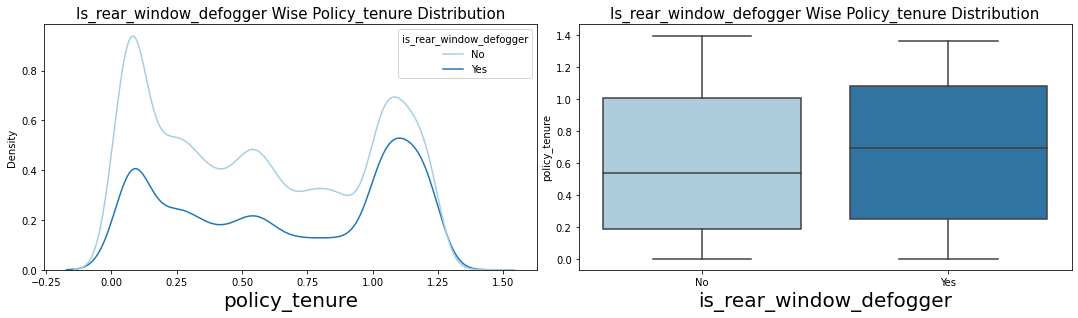

In [23]:
for i,col  in enumerate(categorical_columns[20:30]): 
    _=side_by_side_plot(train,col,'policy_tenure',size=(15,4))

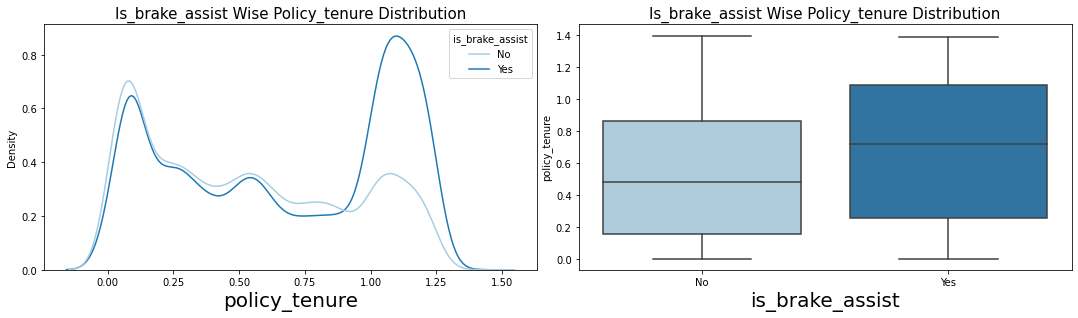

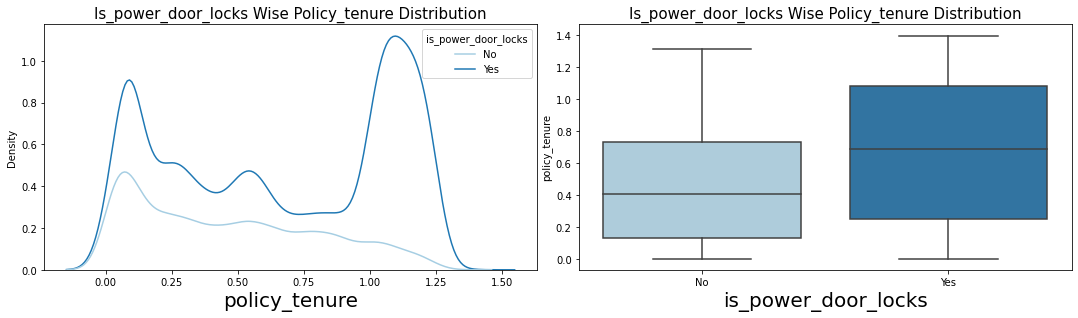

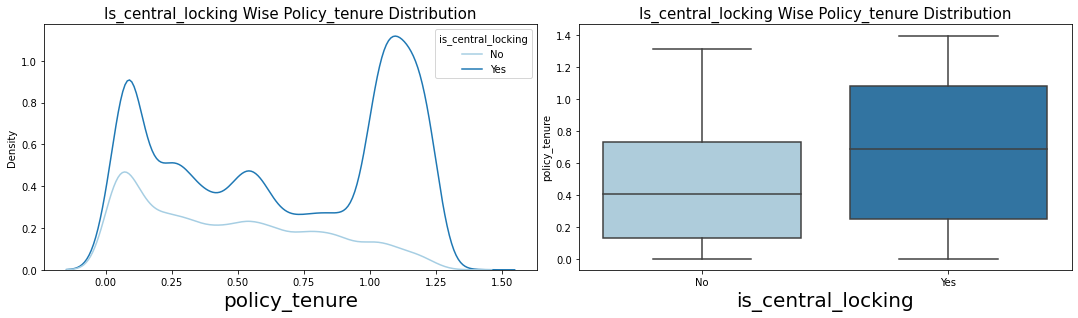

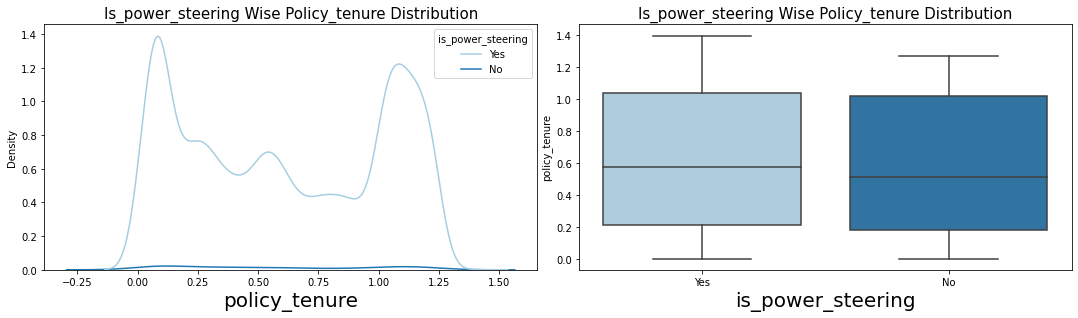

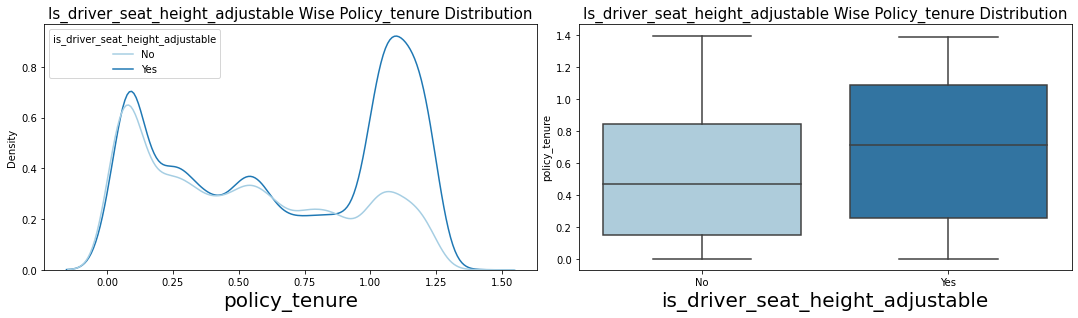

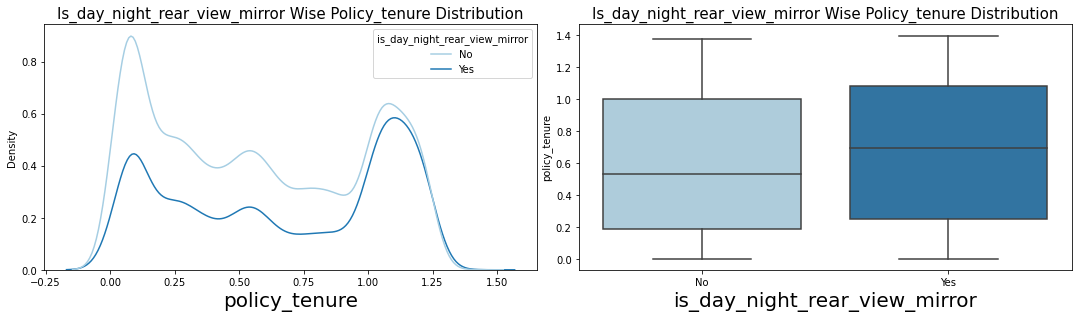

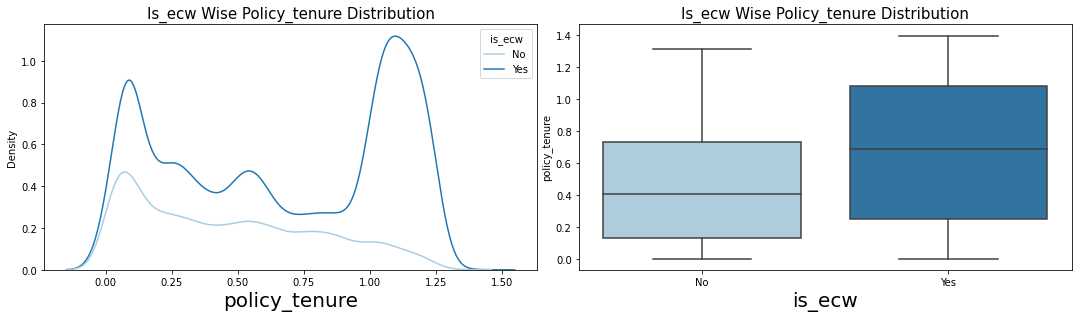

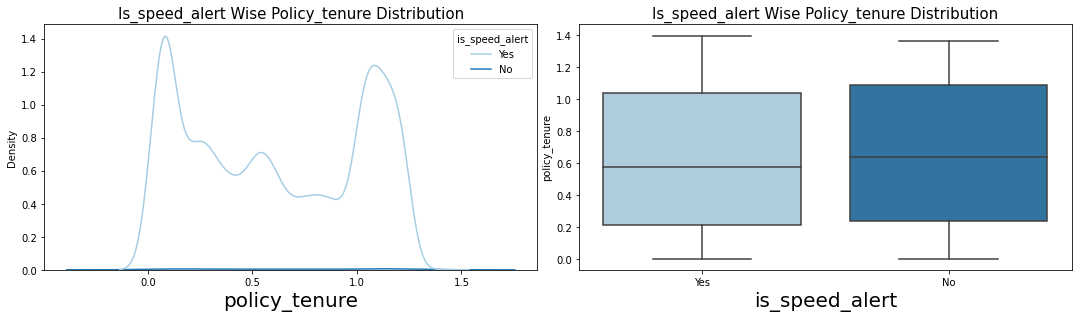

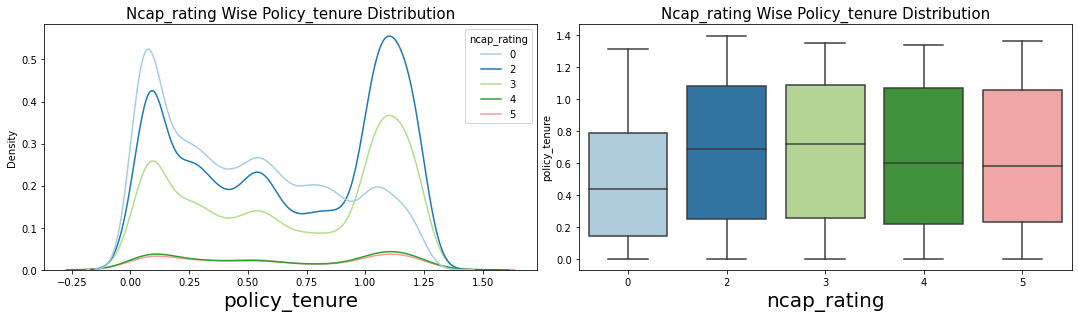

In [24]:
for i,col  in enumerate(categorical_columns[30:]): 
    _=side_by_side_plot(train,col,'policy_tenure',size=(15,4))

### Let's see the age_of_car distribution by all the categorical columns.

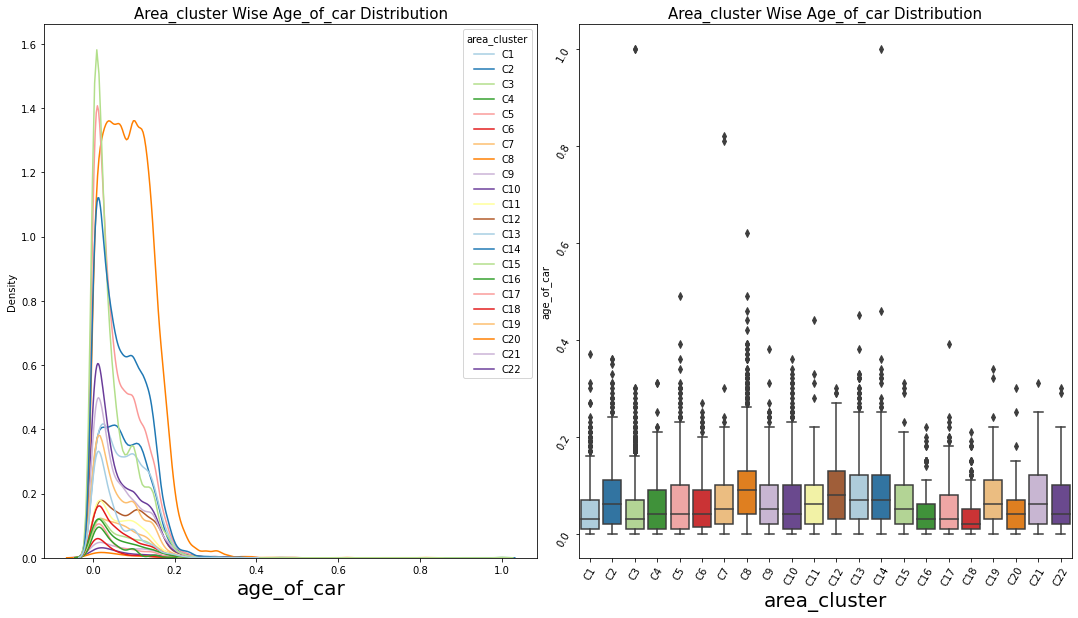

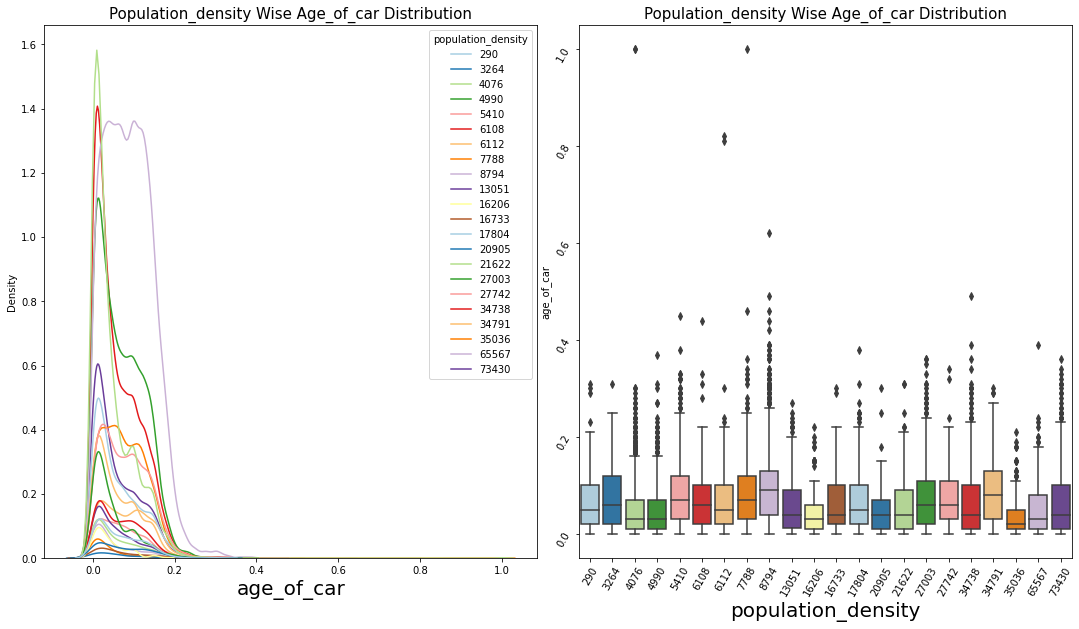

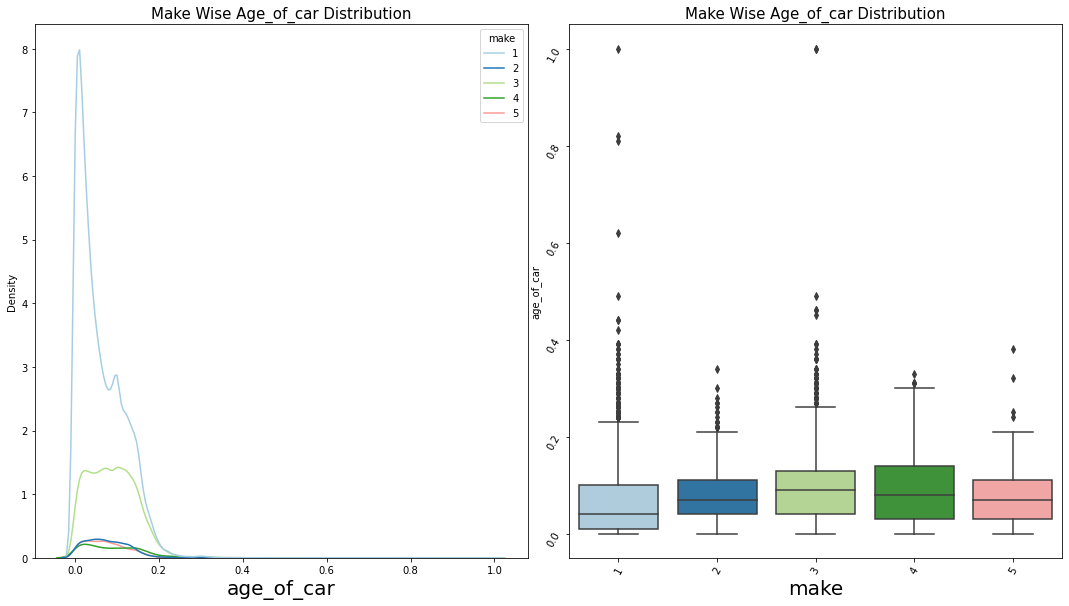

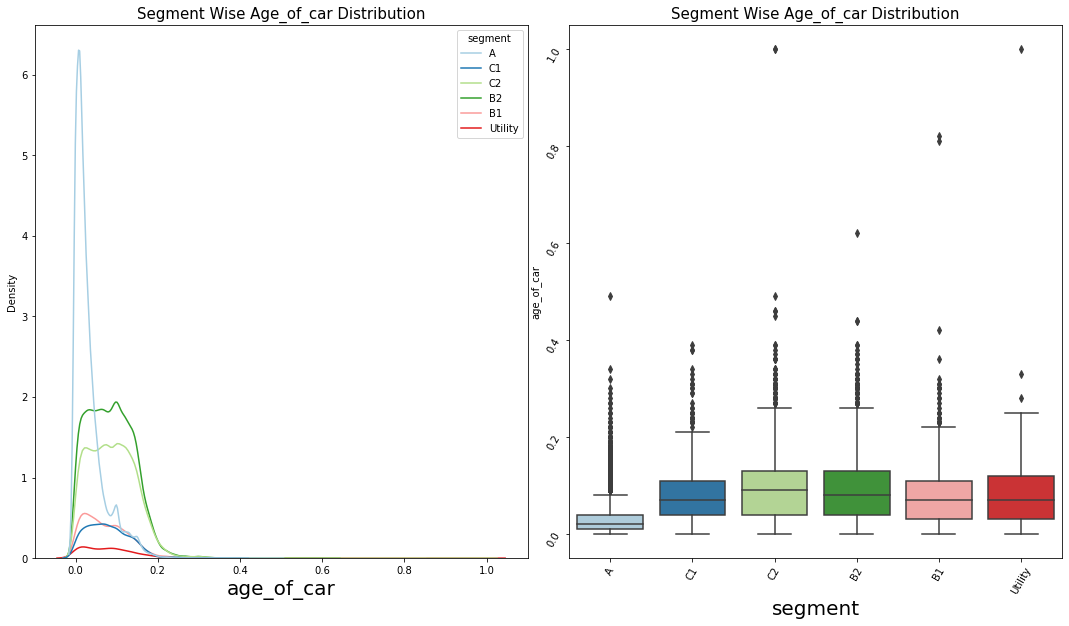

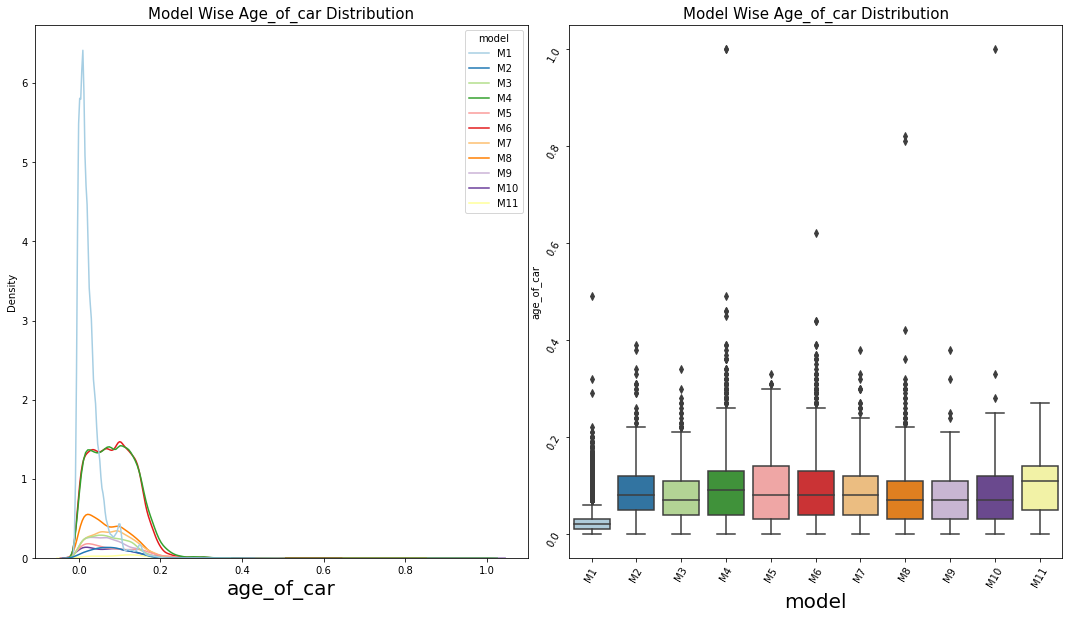

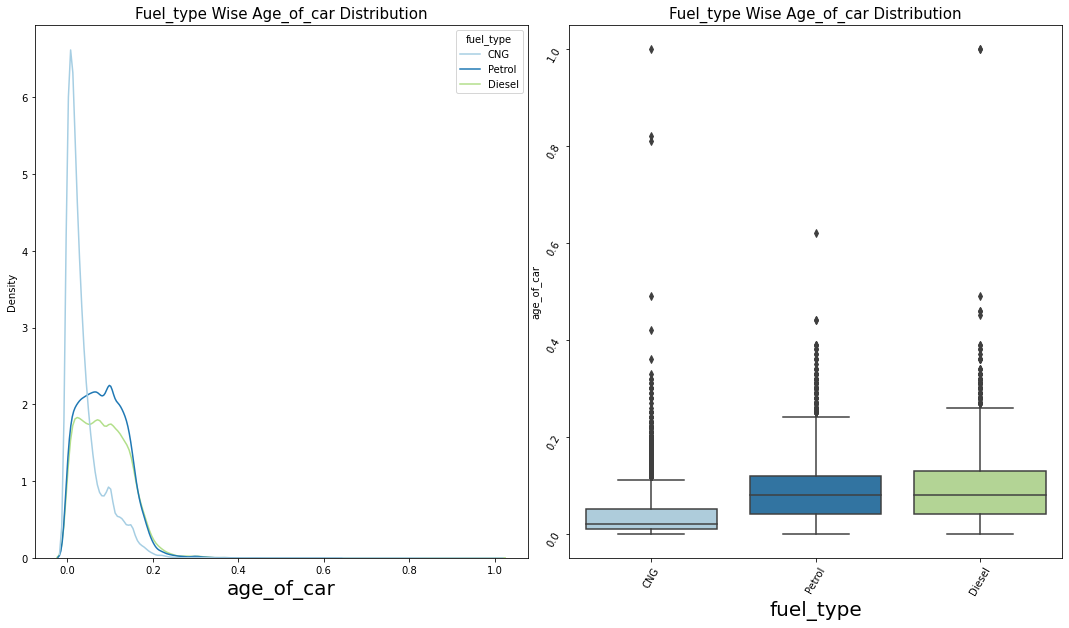

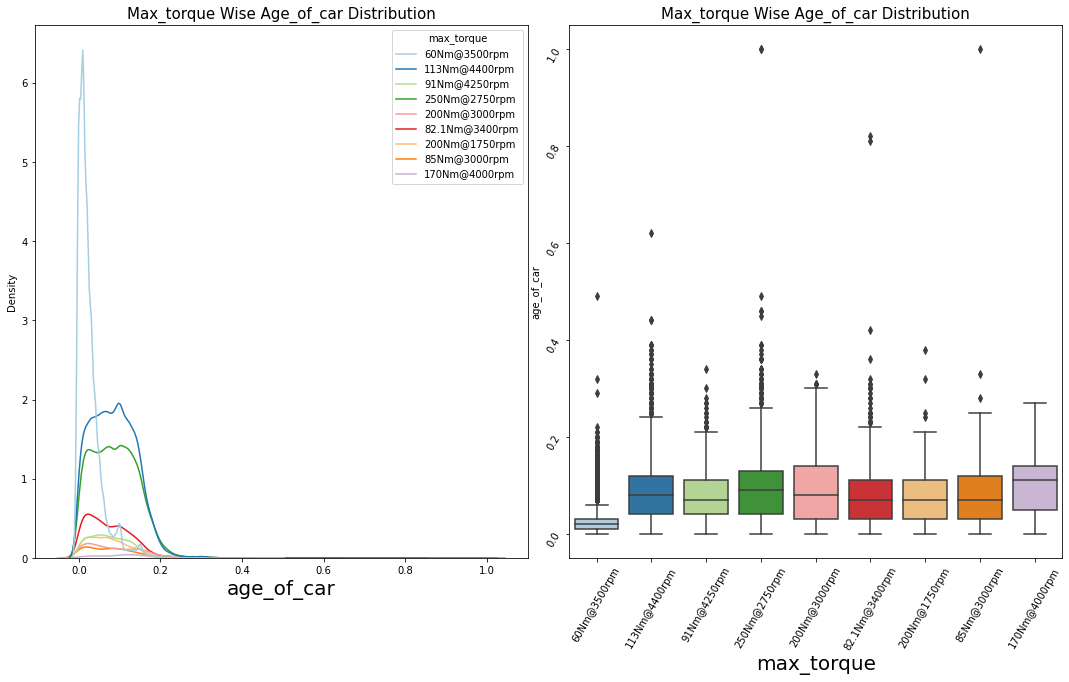

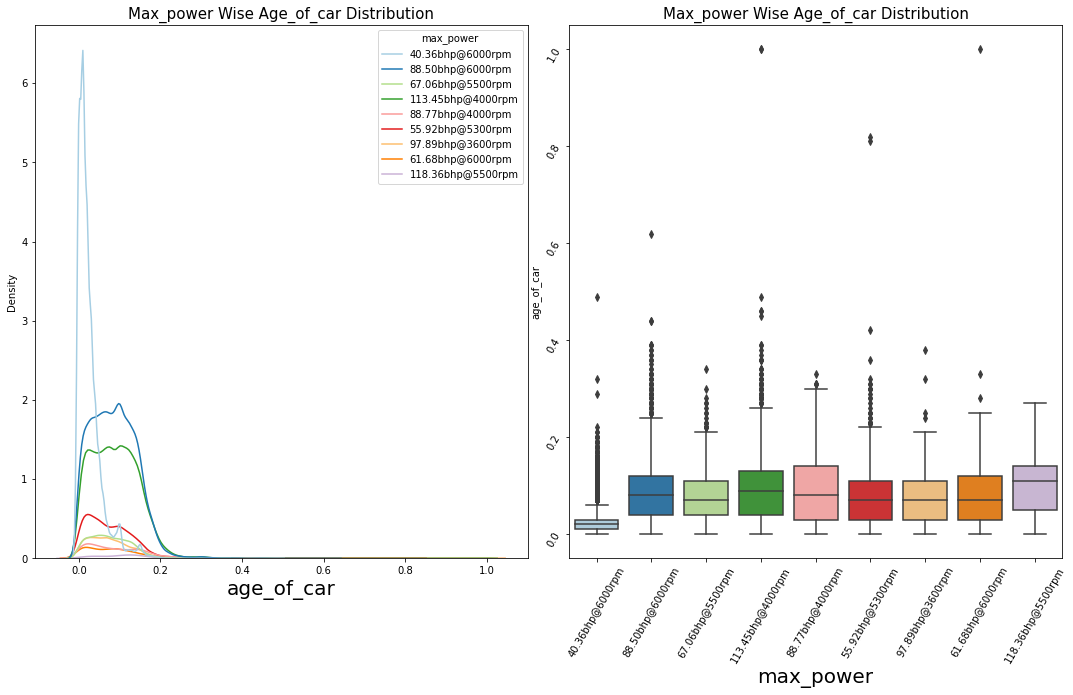

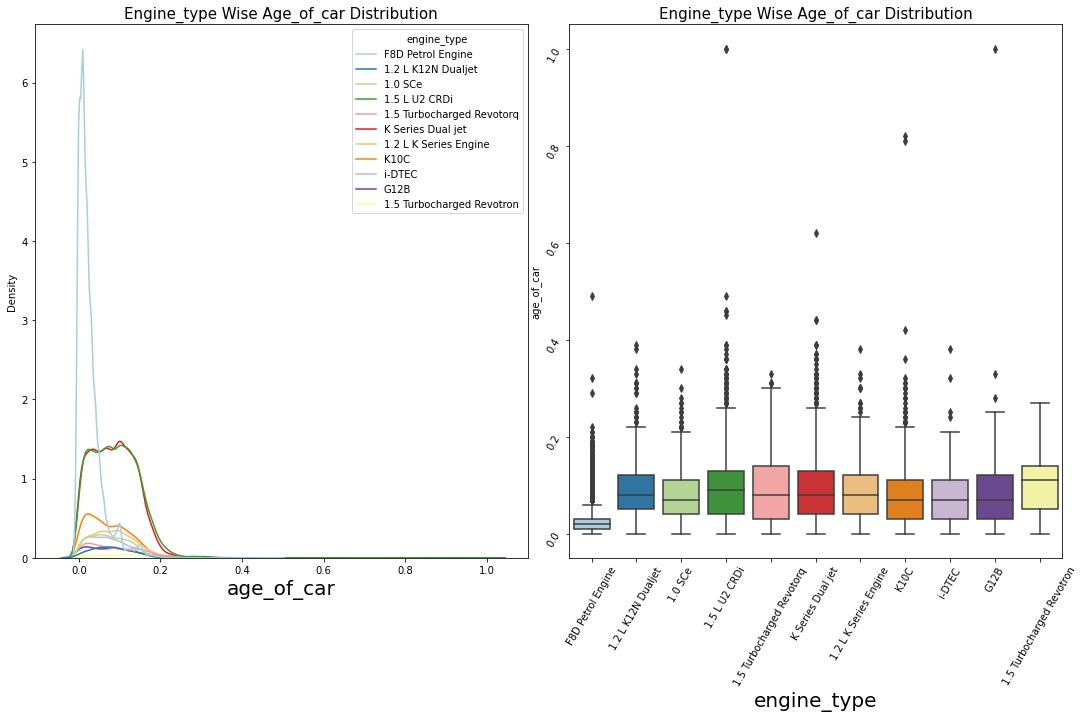

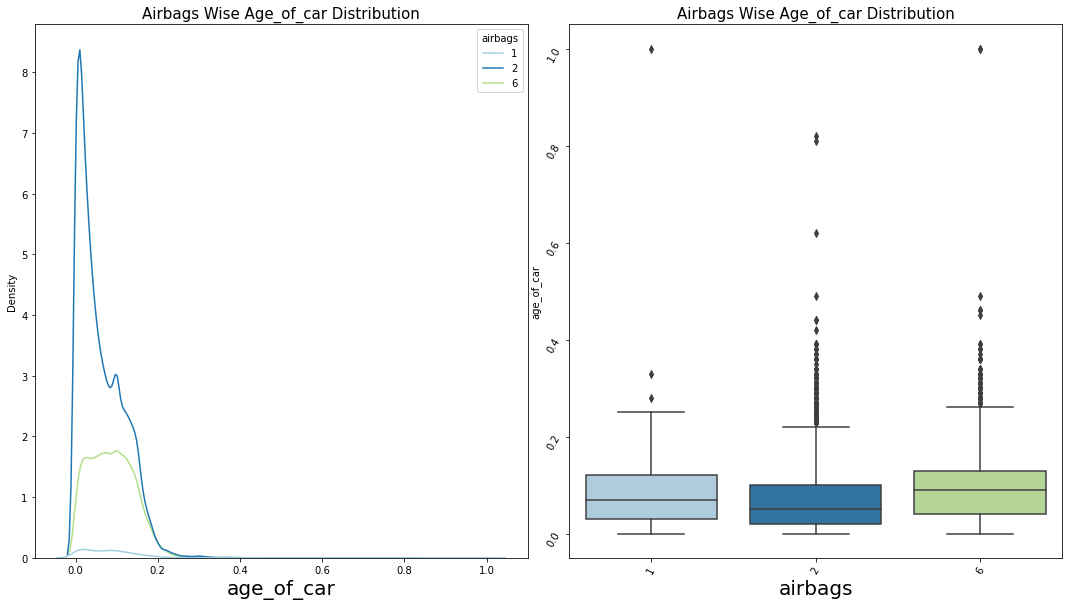

In [27]:
for i,col  in enumerate(categorical_columns[:10]): 
    _=side_by_side_plot(train,col,'age_of_car',rot=60,size=(15,8))

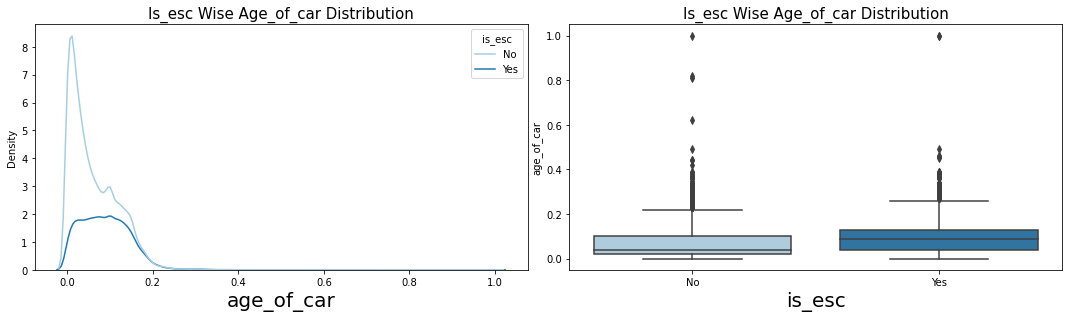

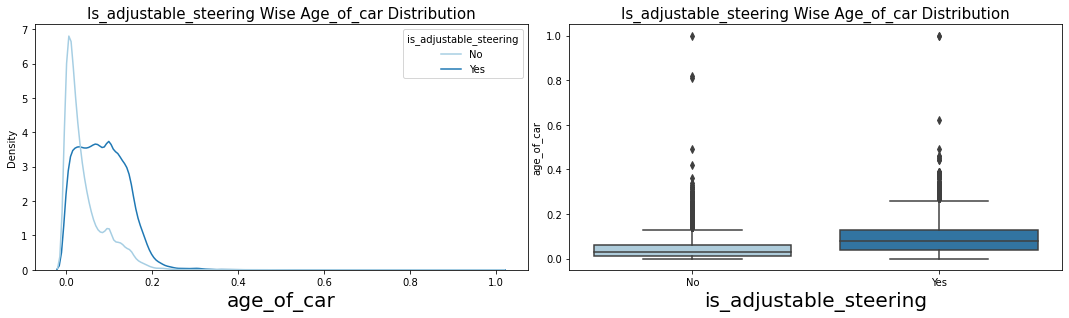

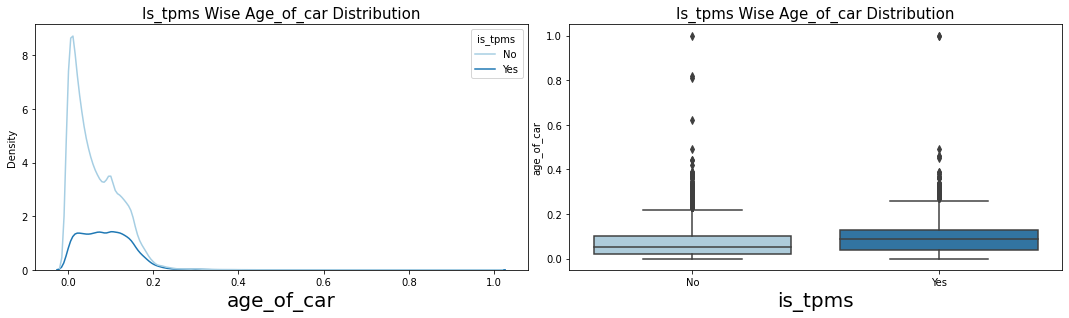

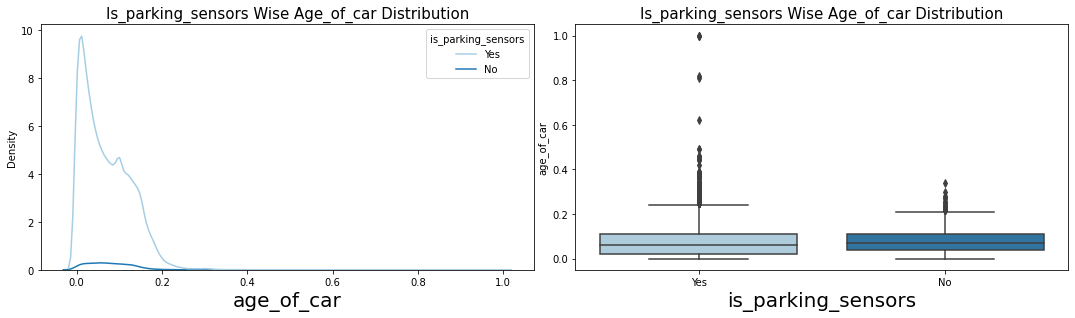

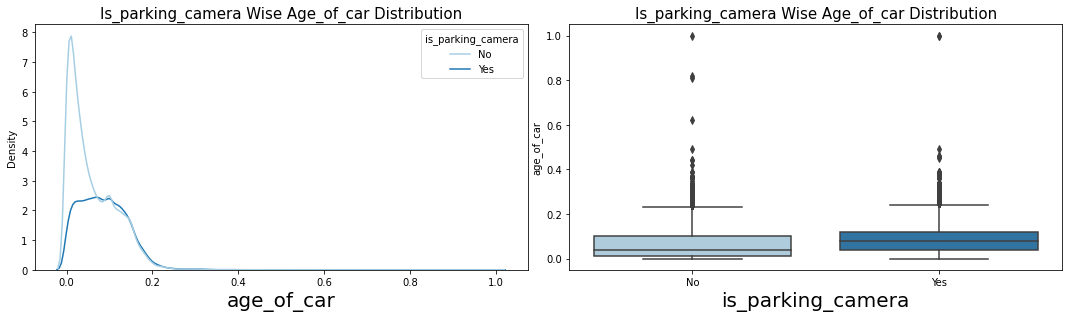

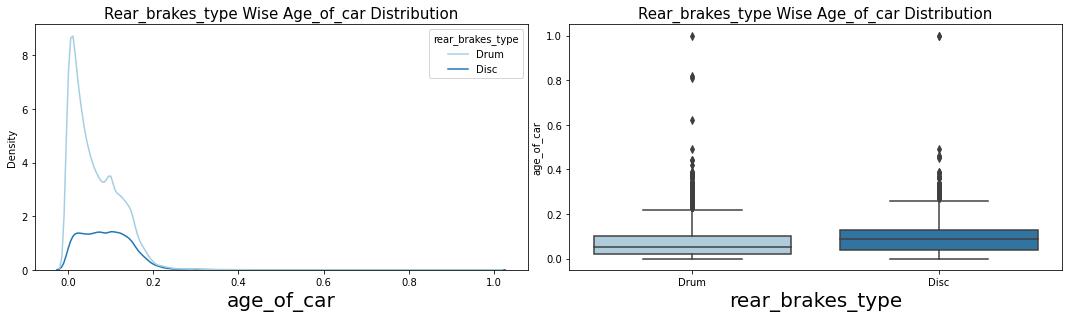

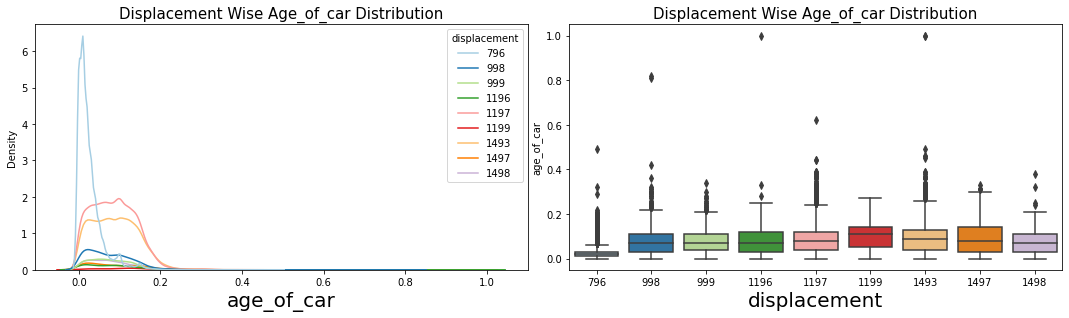

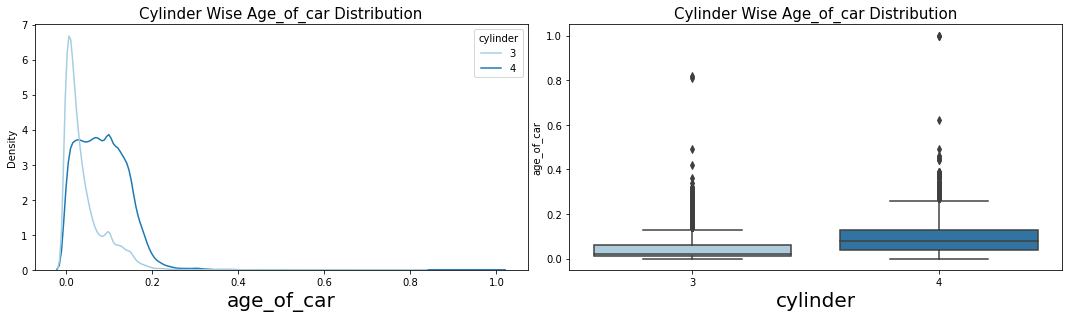

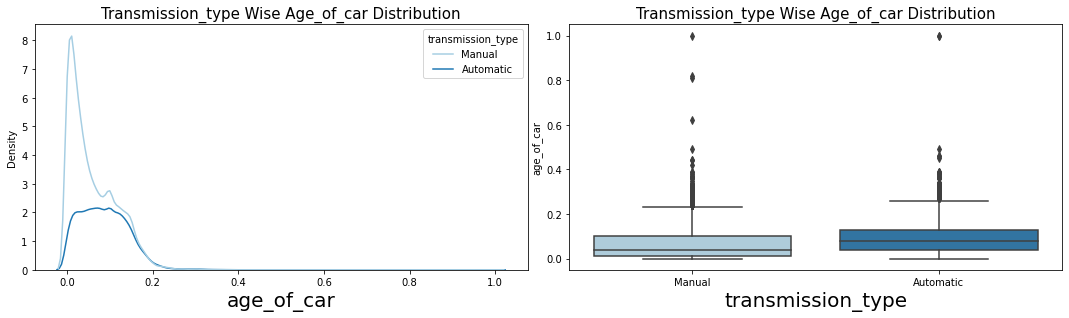

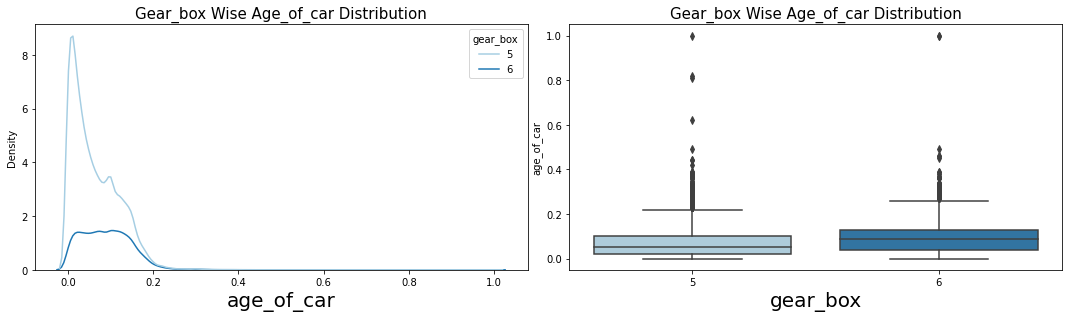

In [34]:
for i,col  in enumerate(categorical_columns[10:20]): 
    _=side_by_side_plot(train,col,'age_of_car',size=(15,4))

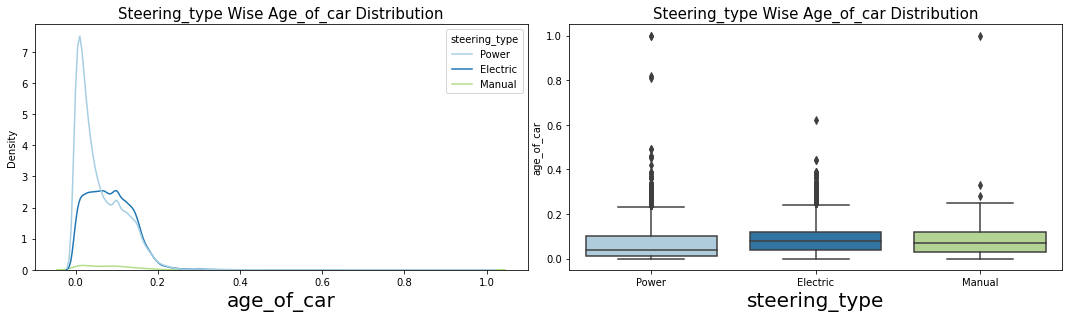

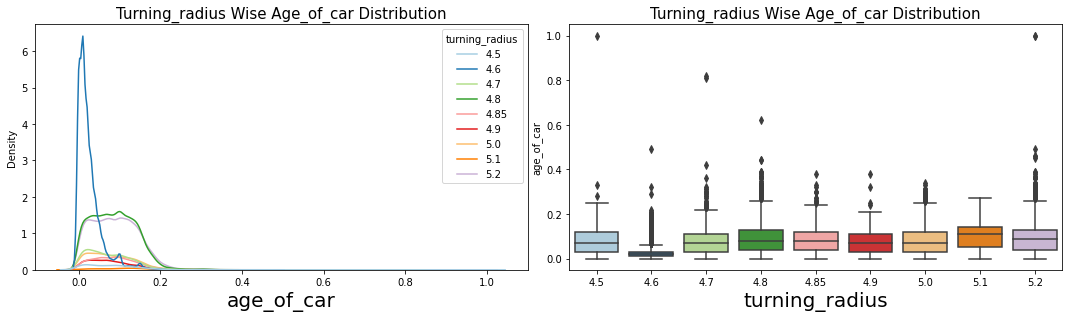

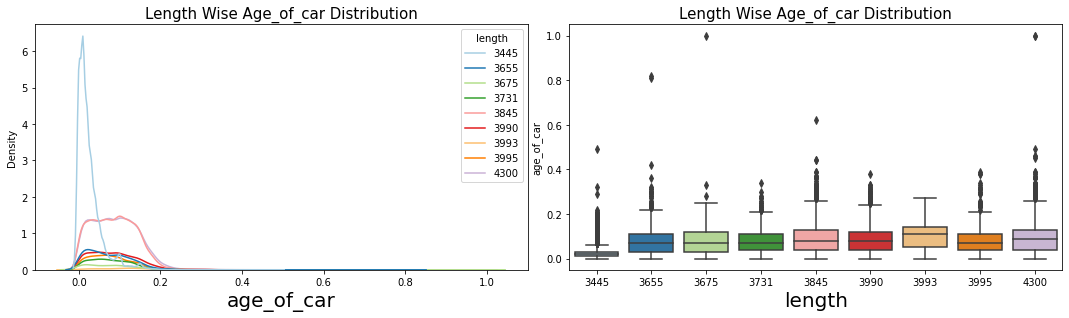

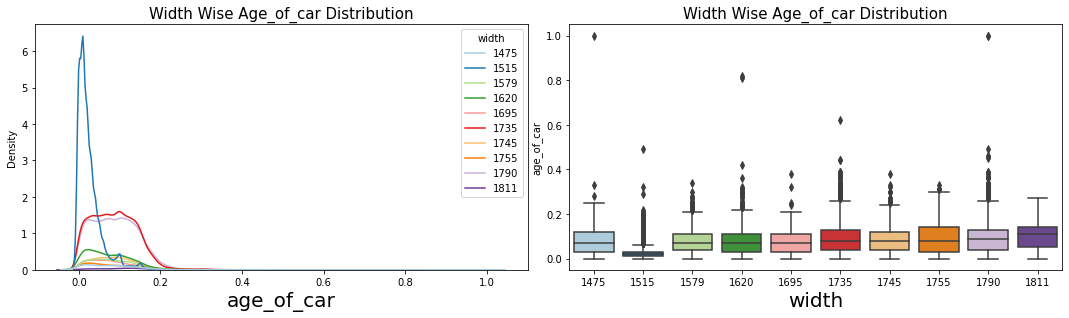

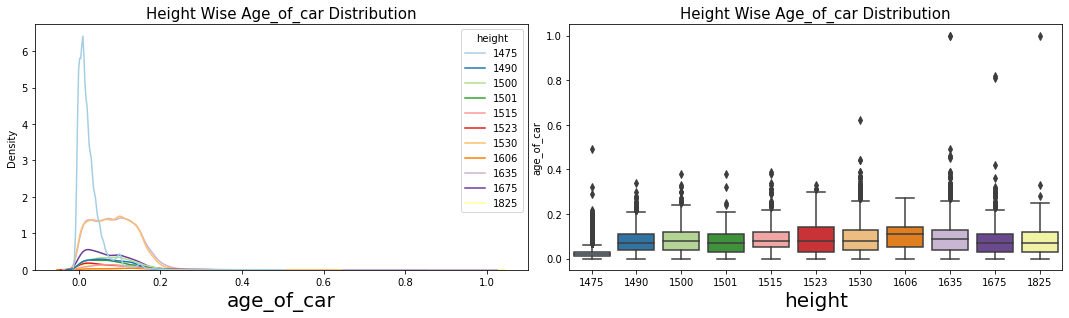

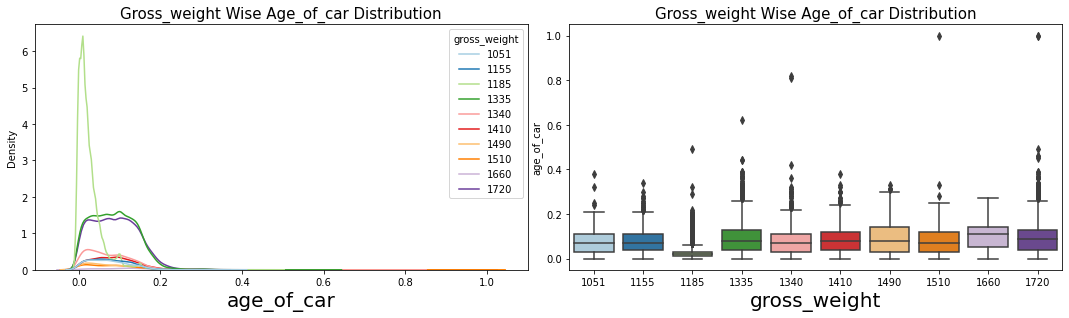

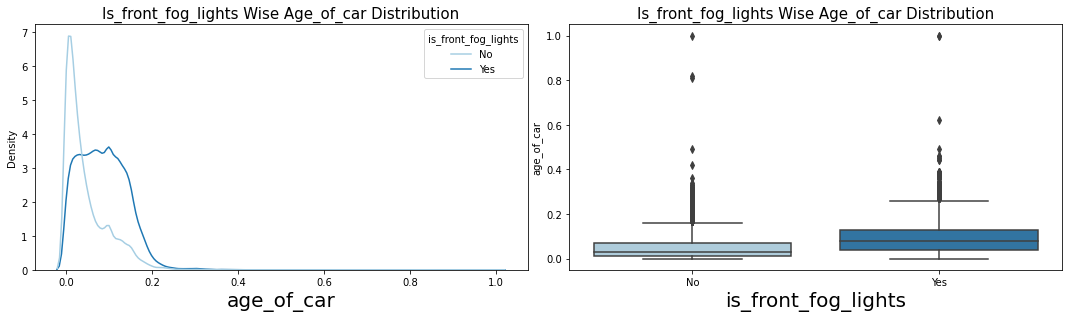

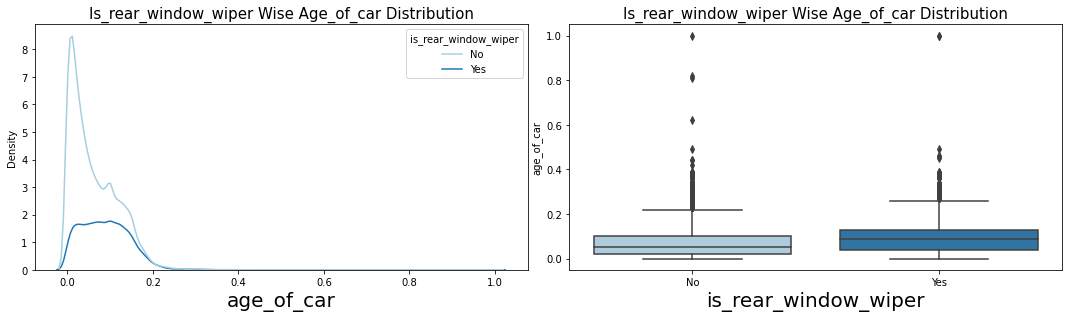

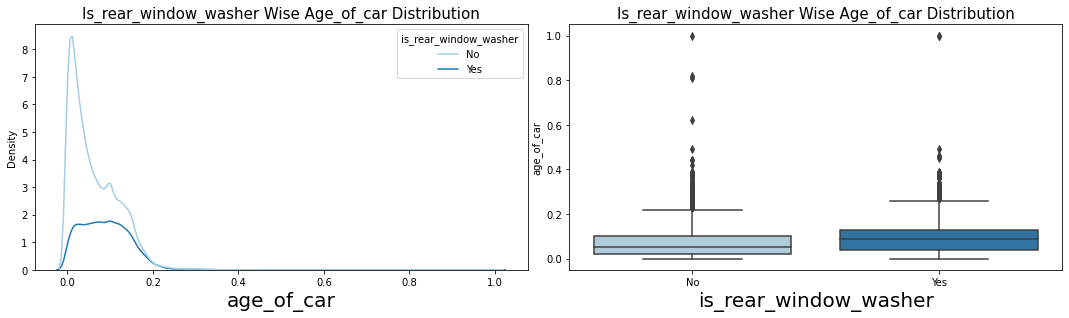

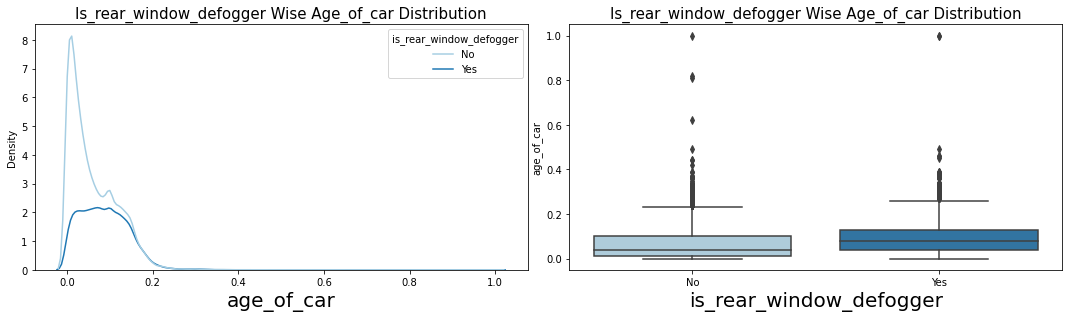

In [35]:
for i,col  in enumerate(categorical_columns[20:30]): 
    _=side_by_side_plot(train,col,'age_of_car',size=(15,4))

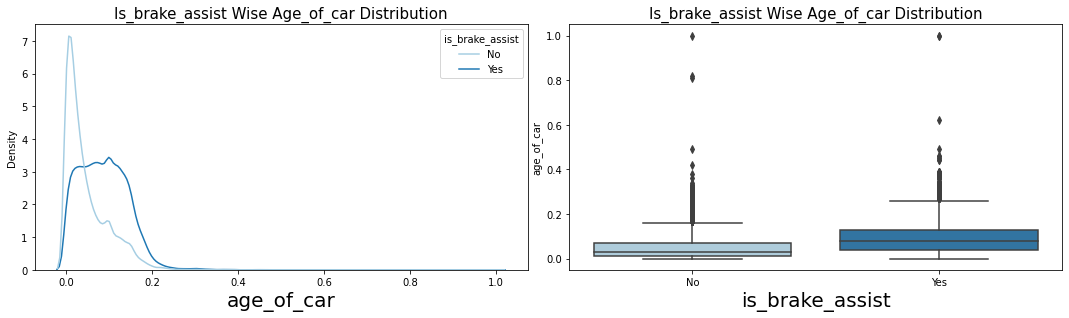

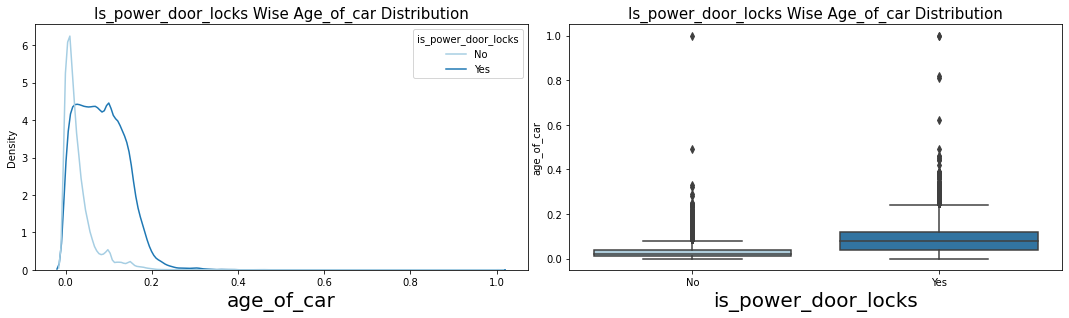

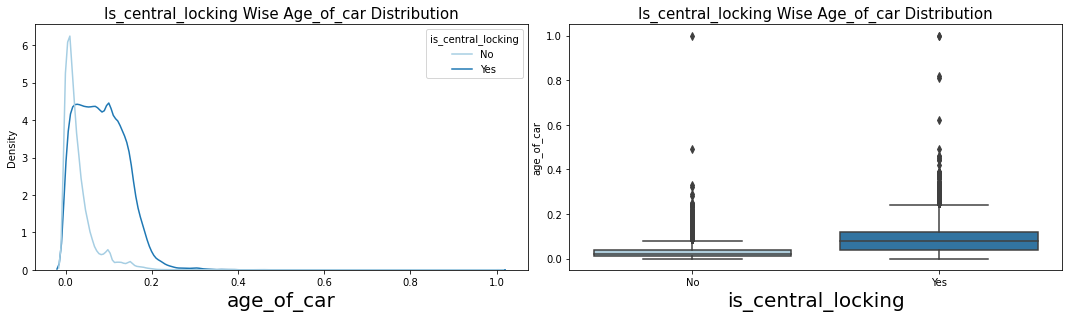

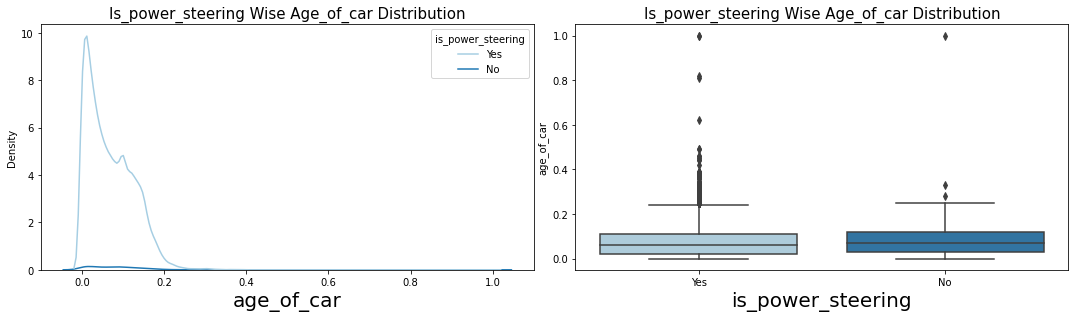

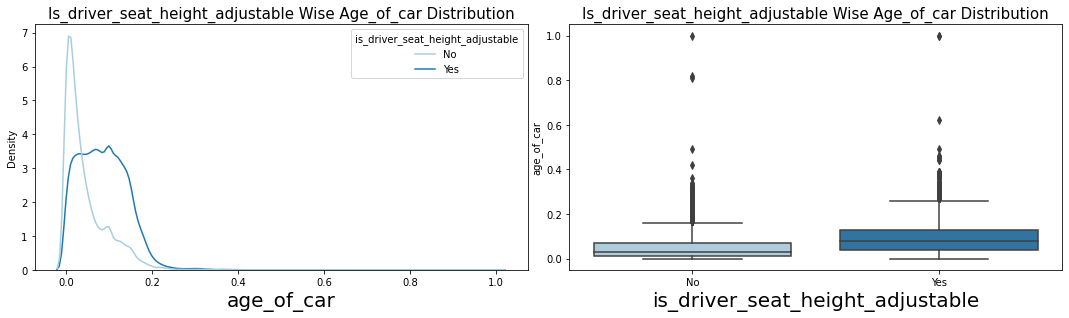

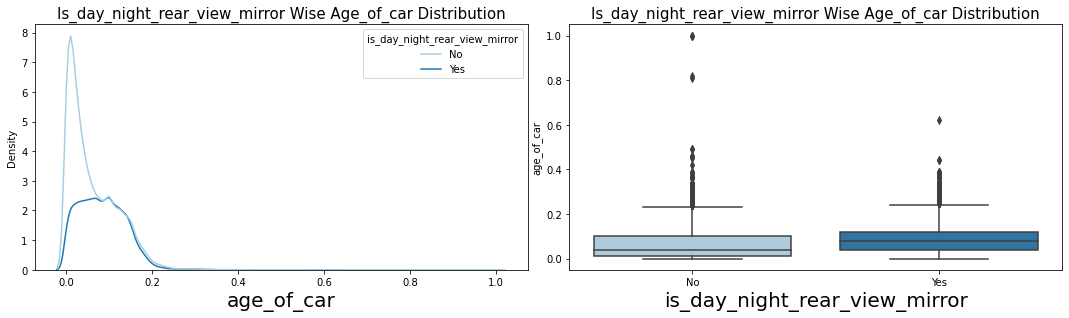

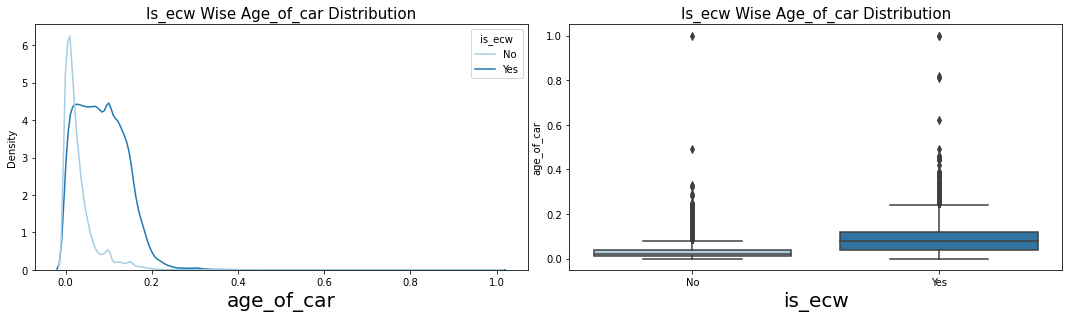

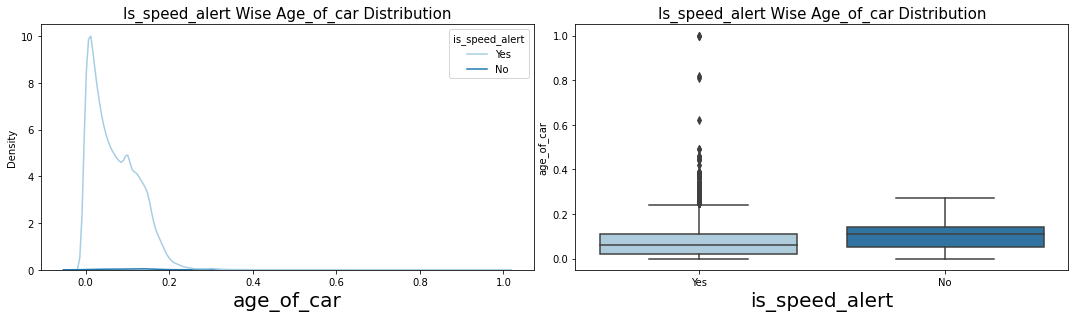

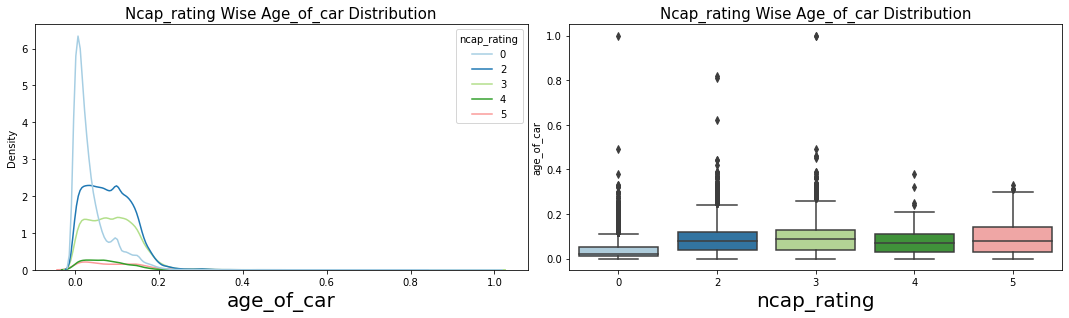

In [36]:
for i,col  in enumerate(categorical_columns[30:]): 
    _=side_by_side_plot(train,col,'age_of_car',size=(15,4))

### Let's see the age_of_policyholder distribution by all the categorical columns.

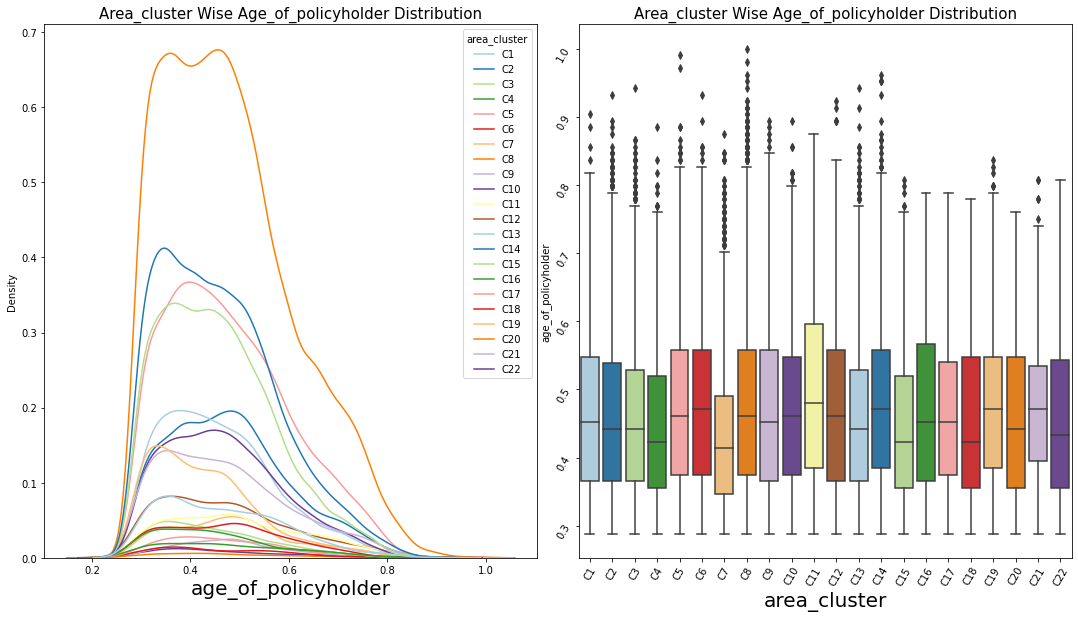

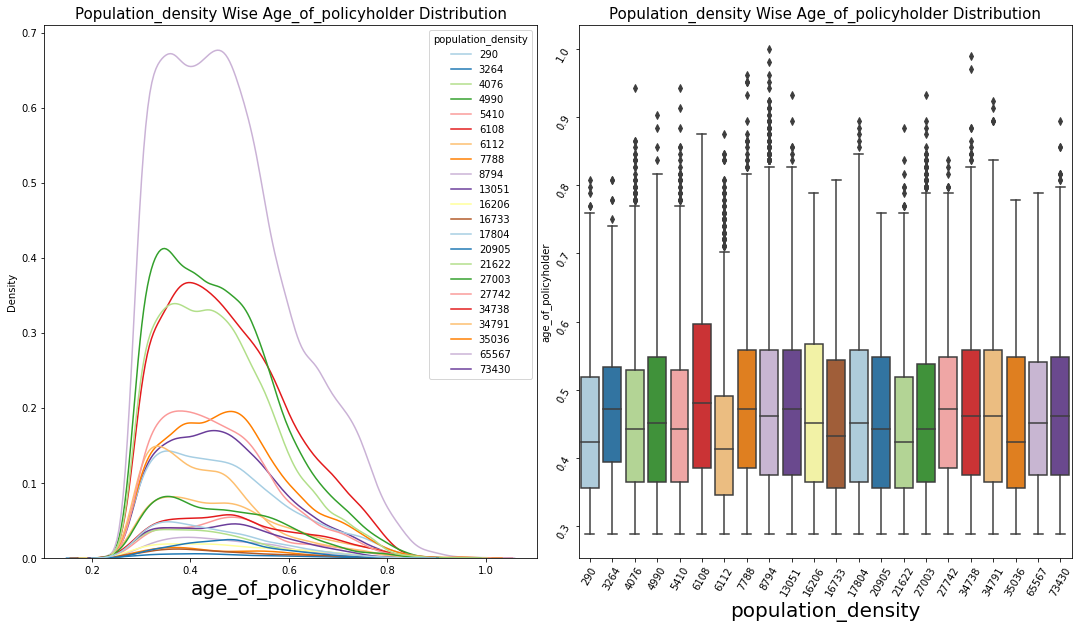

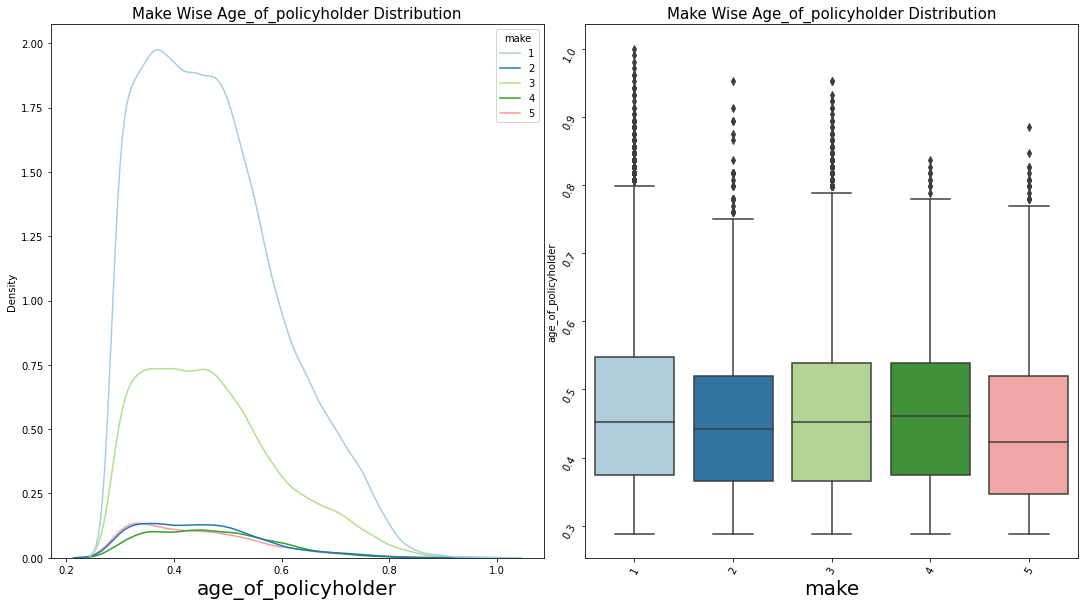

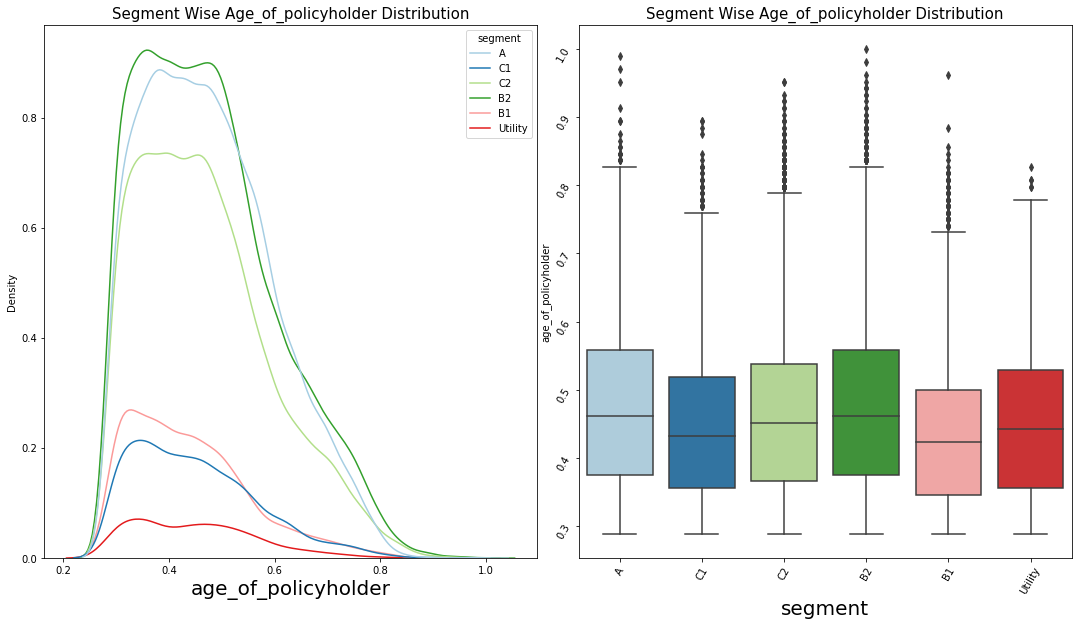

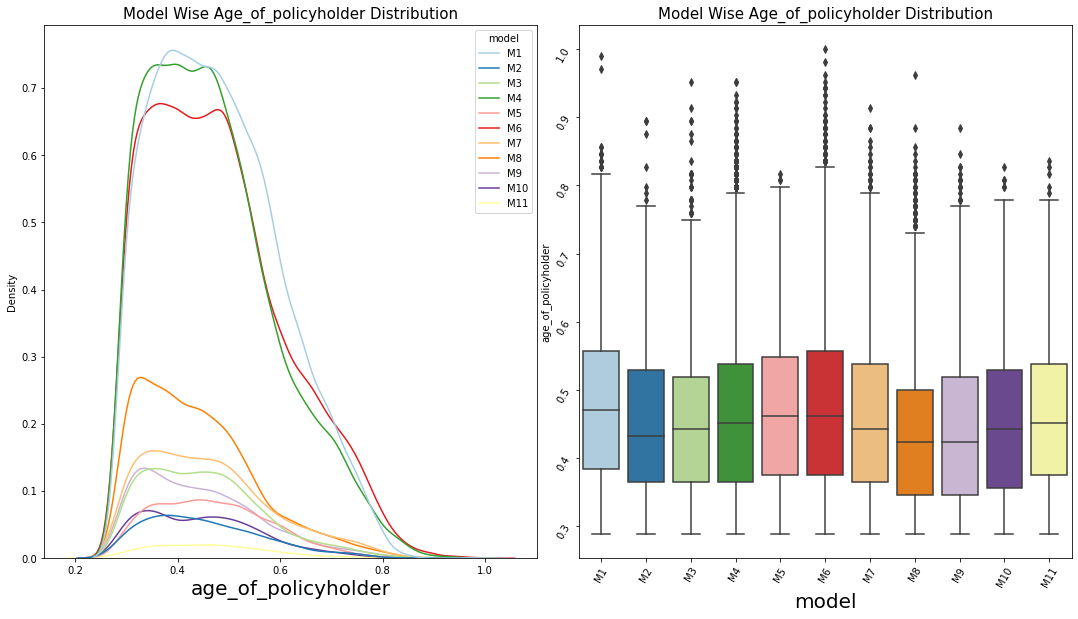

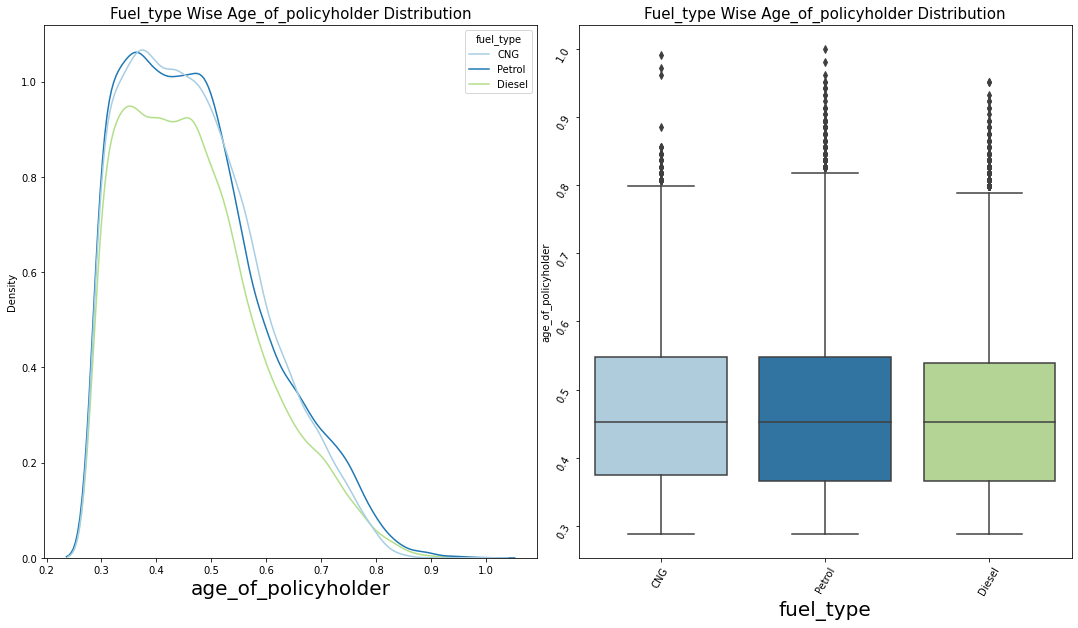

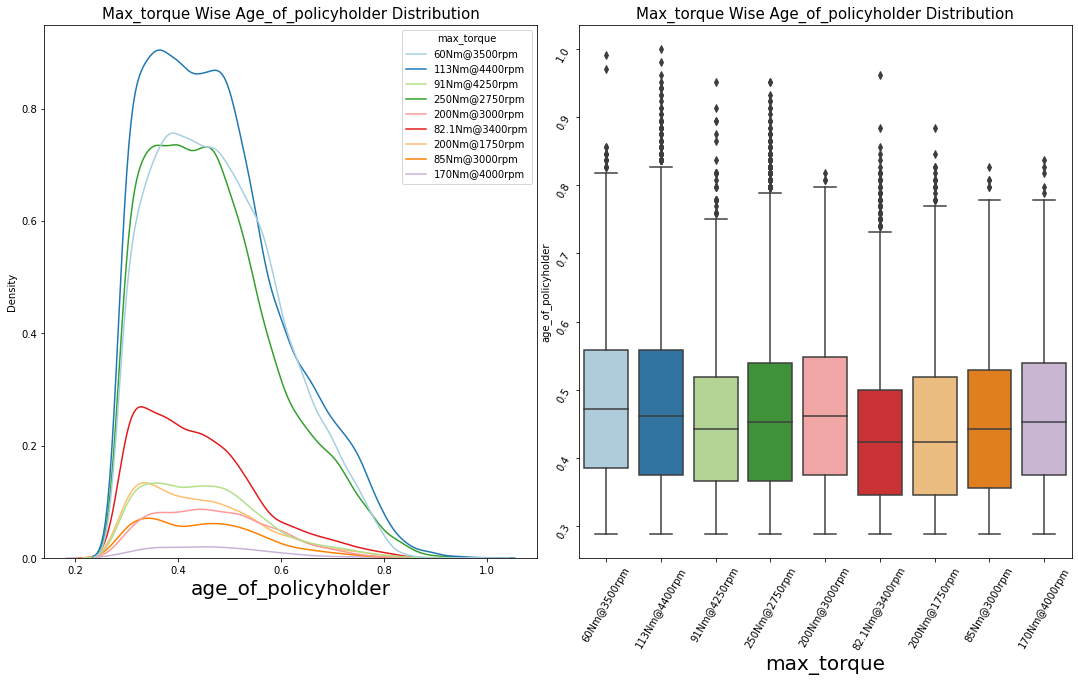

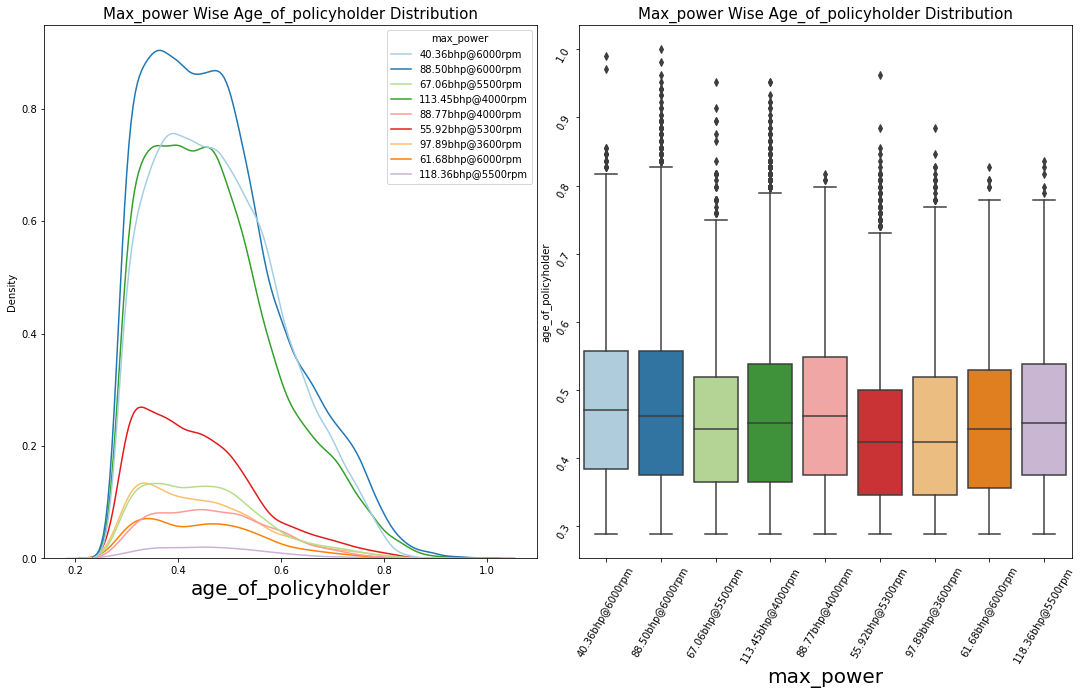

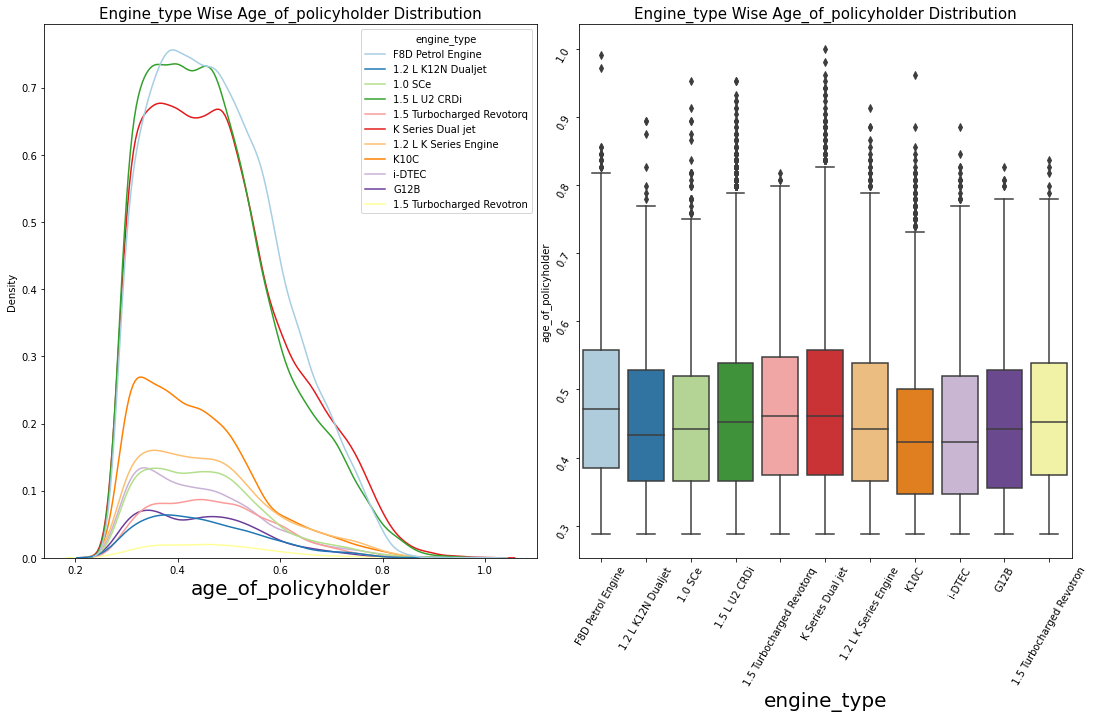

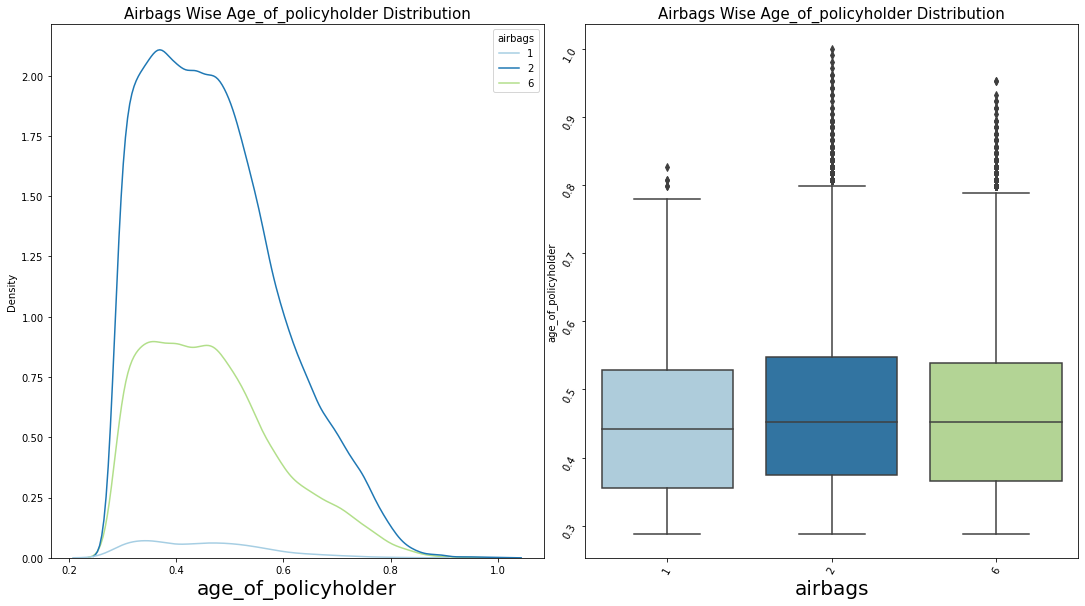

In [37]:
for i,col  in enumerate(categorical_columns[:10]): 
    _=side_by_side_plot(train,col,'age_of_policyholder',rot=60,size=(15,8))

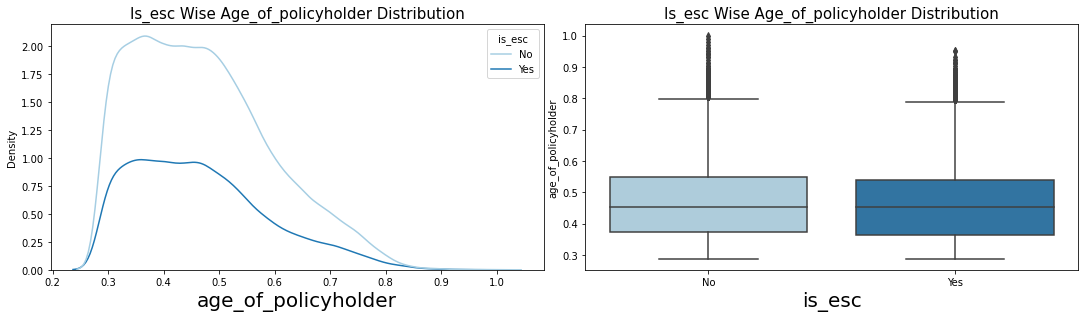

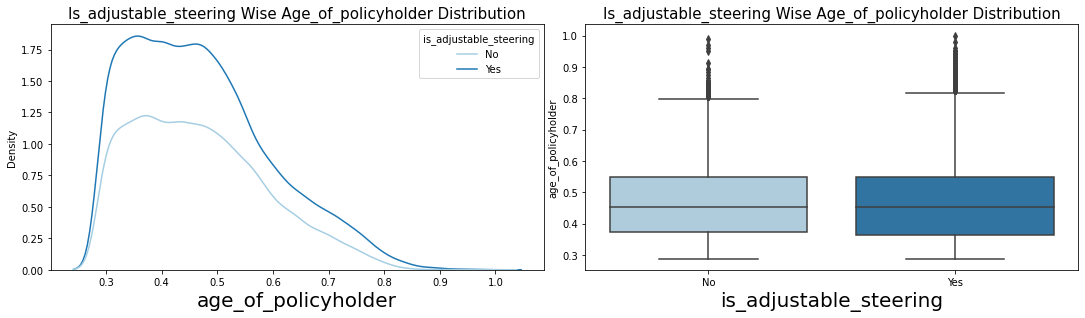

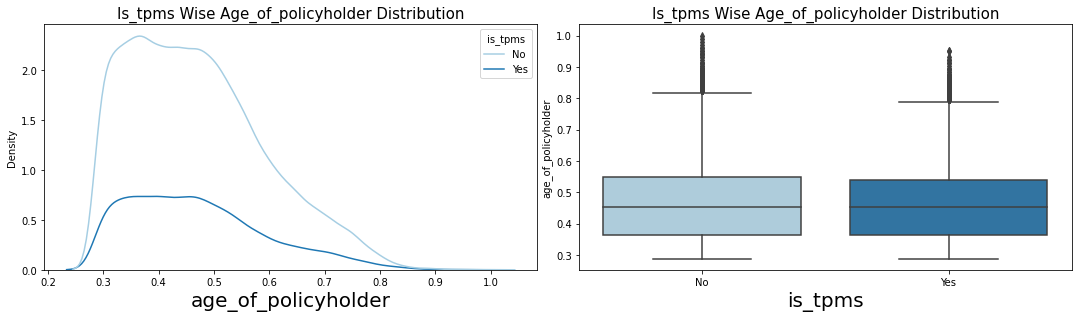

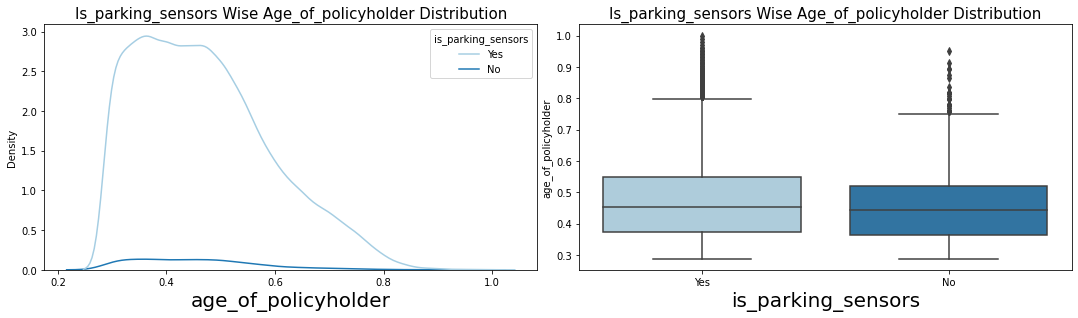

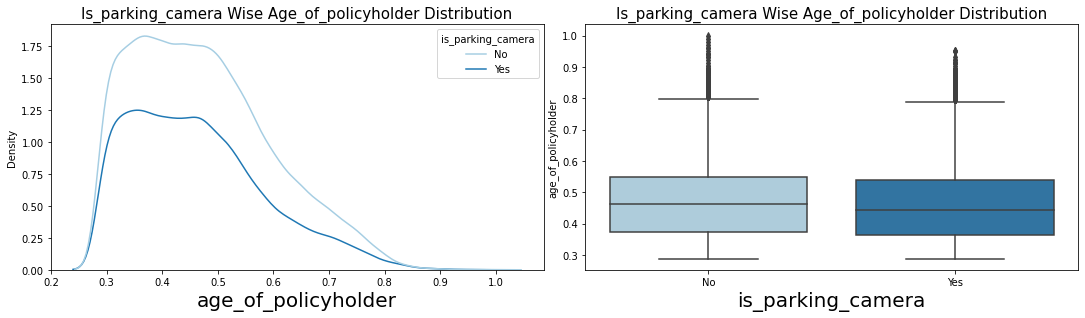

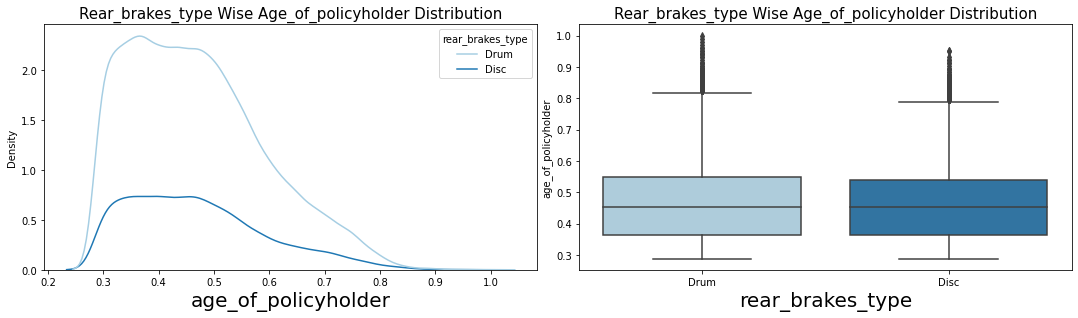

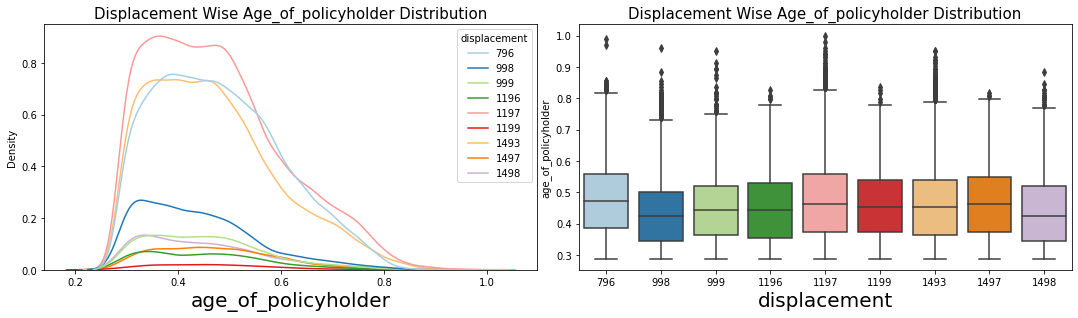

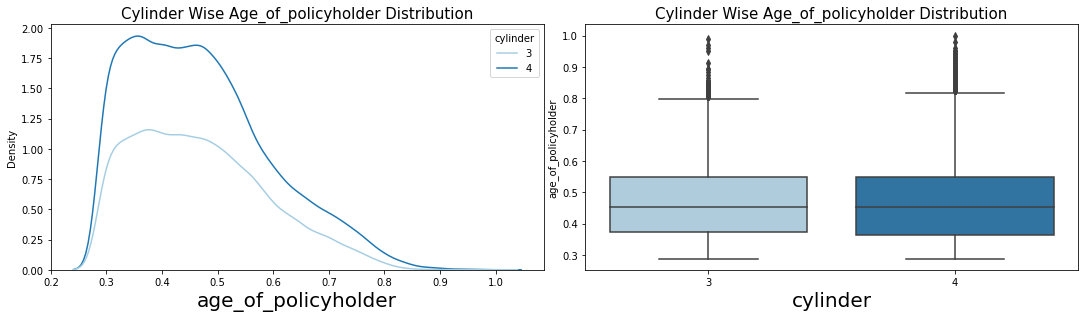

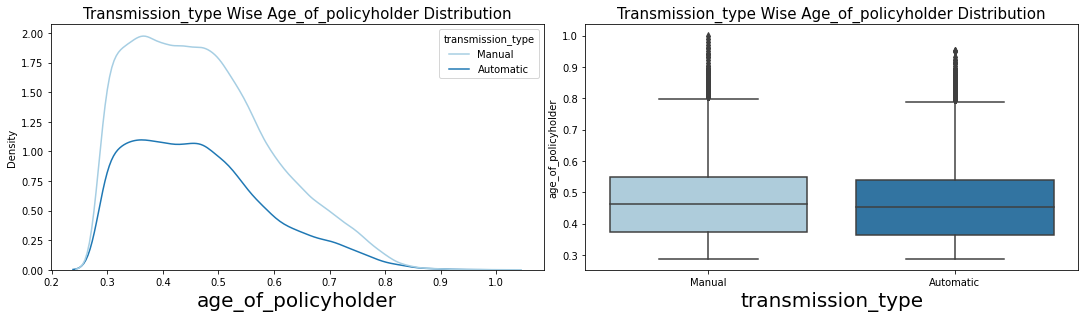

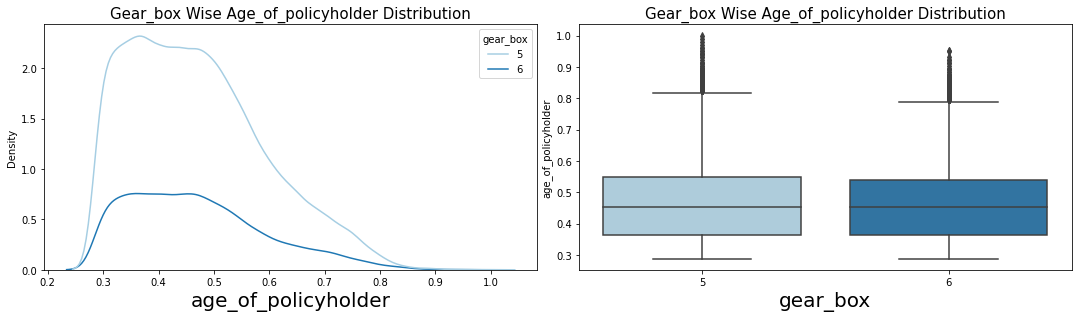

In [38]:
for i,col  in enumerate(categorical_columns[10:20]): 
    _=side_by_side_plot(train,col,'age_of_policyholder',size=(15,4))

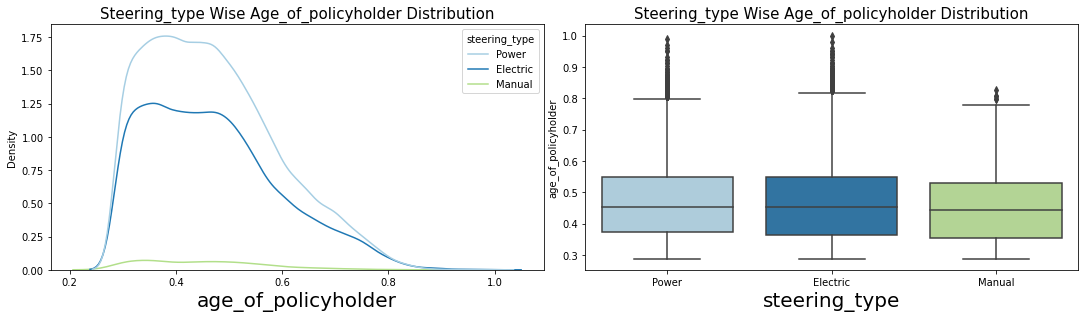

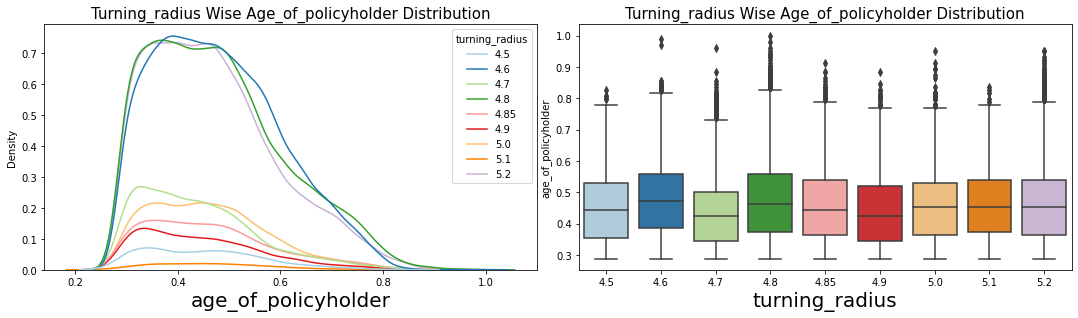

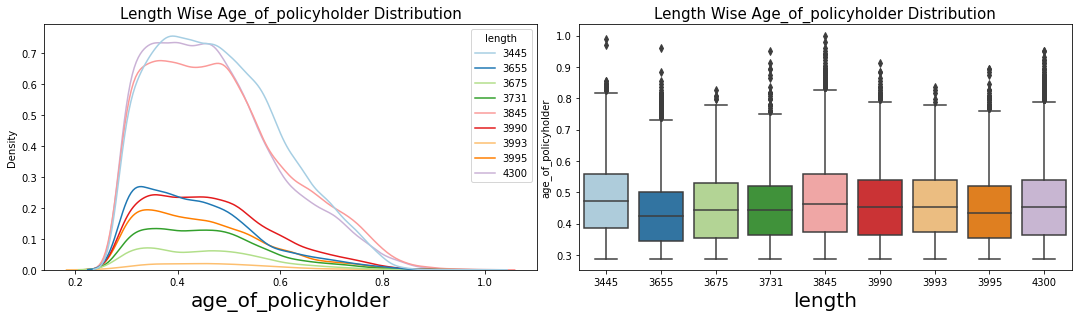

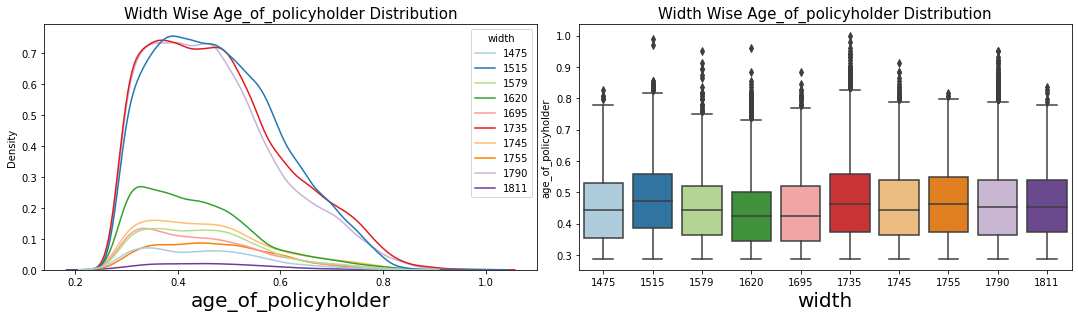

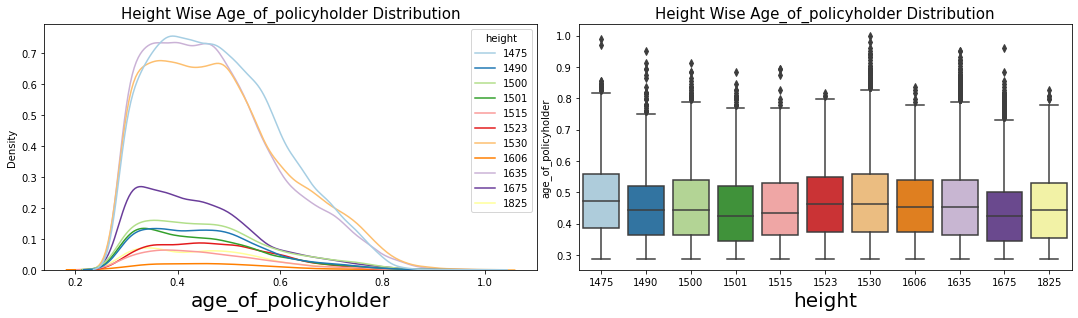

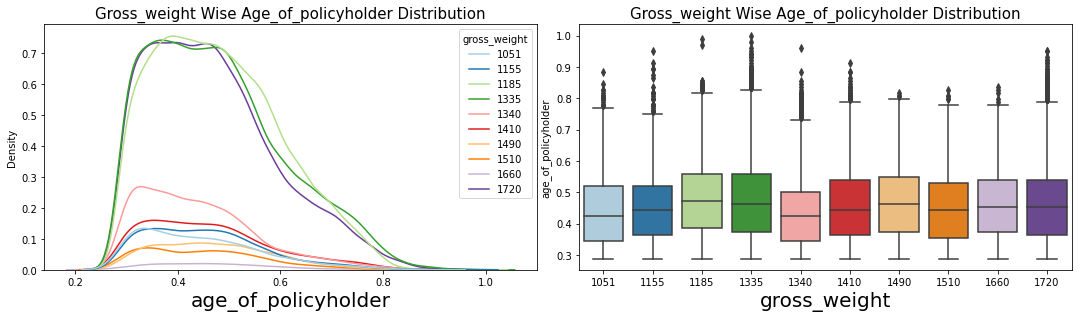

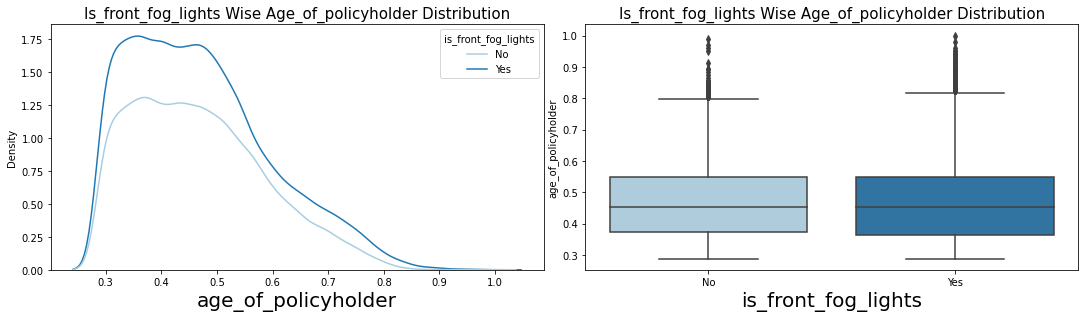

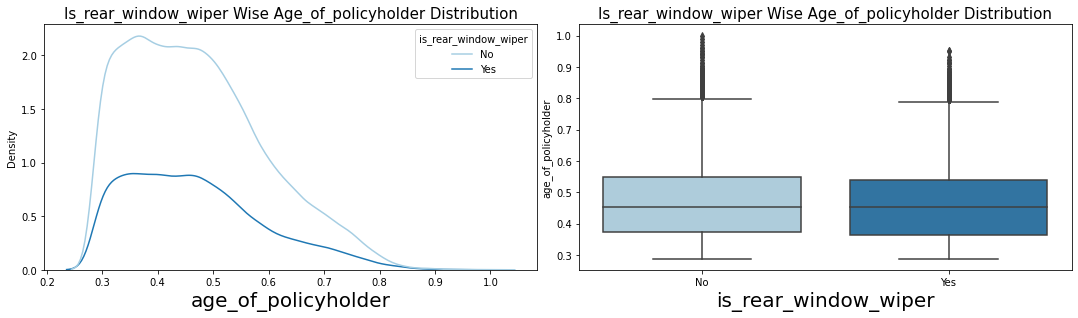

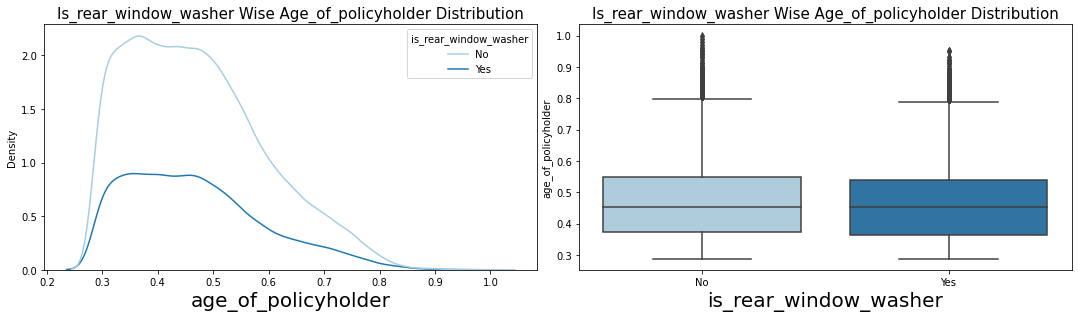

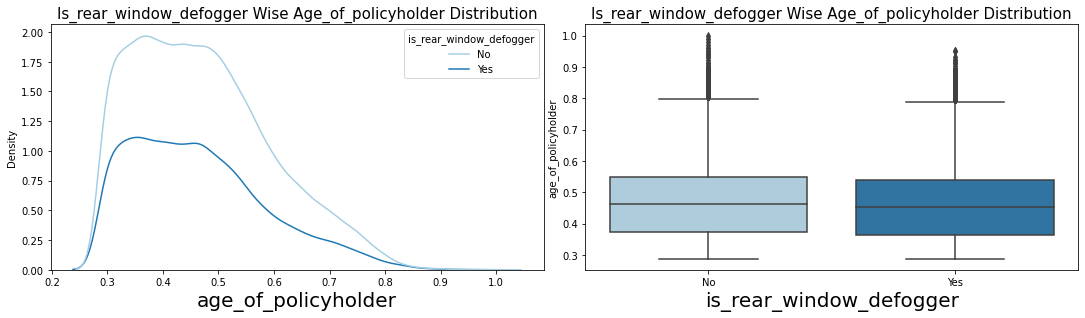

In [39]:
for i,col  in enumerate(categorical_columns[20:30]): 
    _=side_by_side_plot(train,col,'age_of_policyholder',size=(15,4))

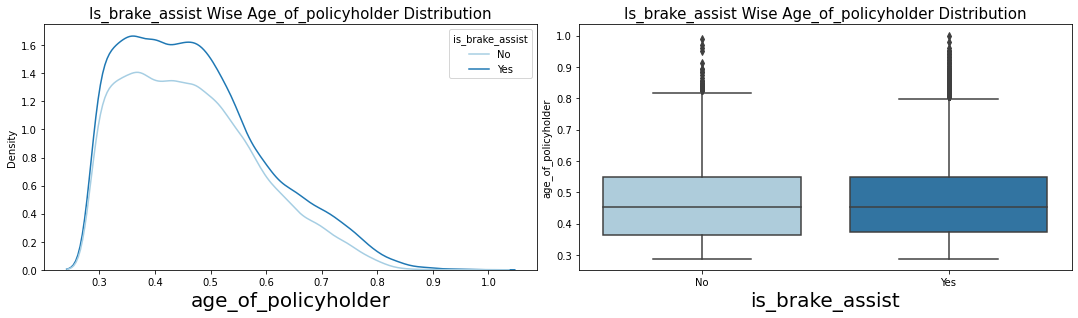

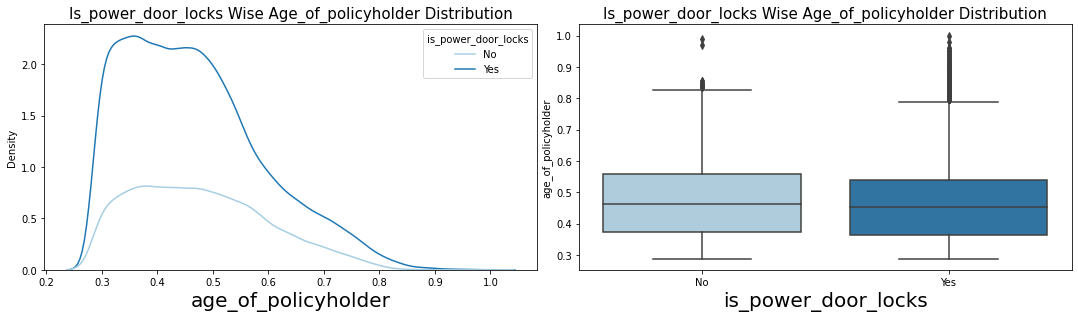

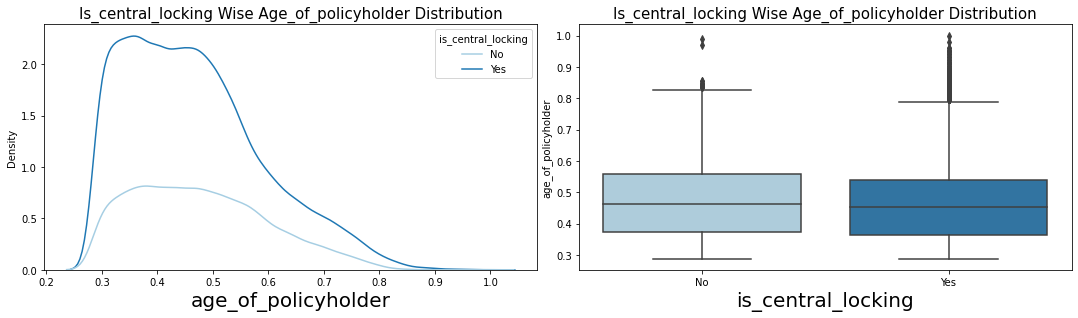

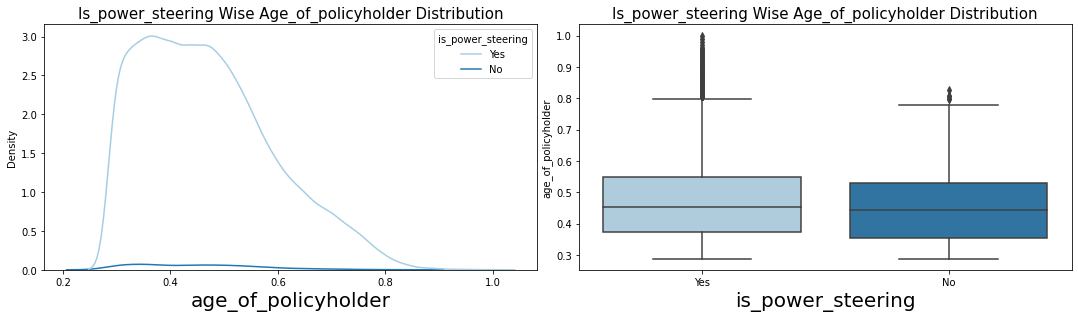

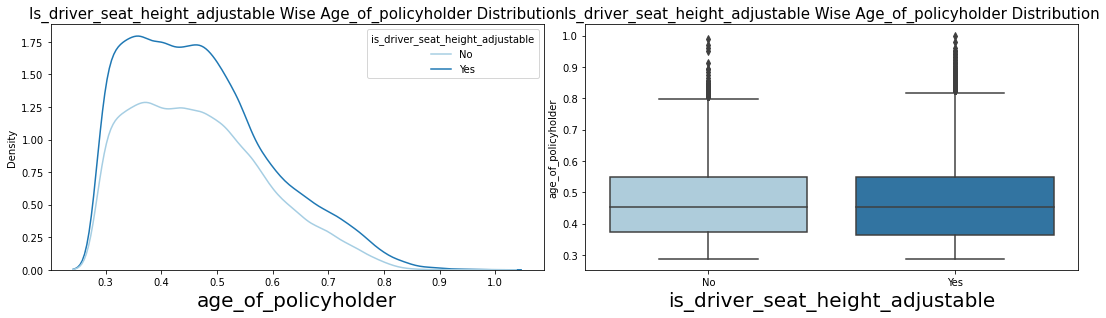

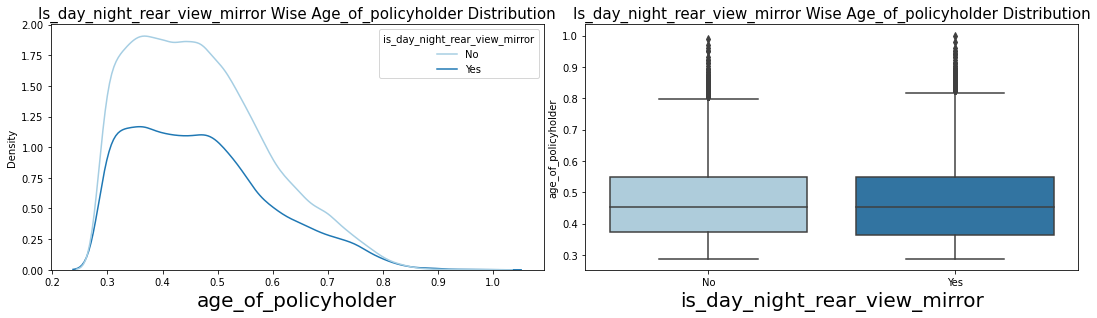

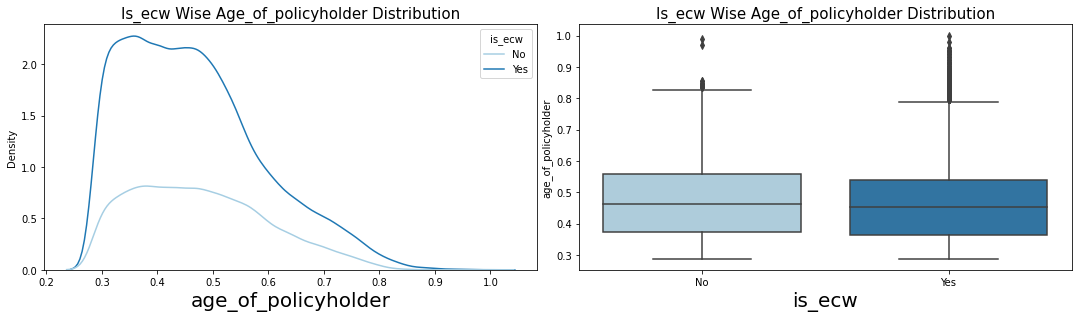

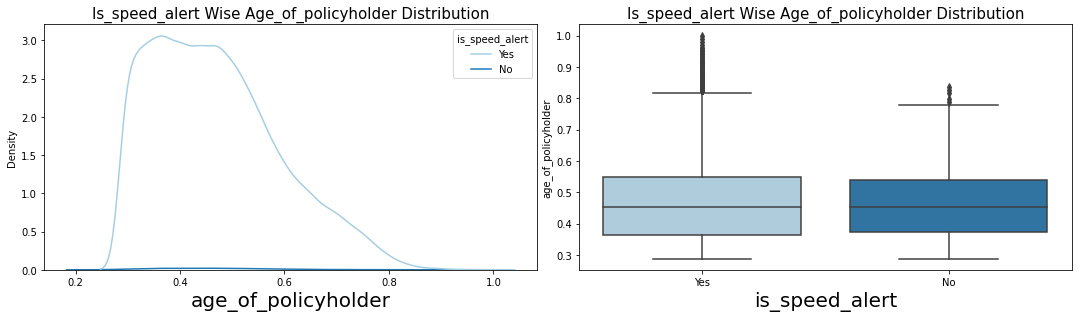

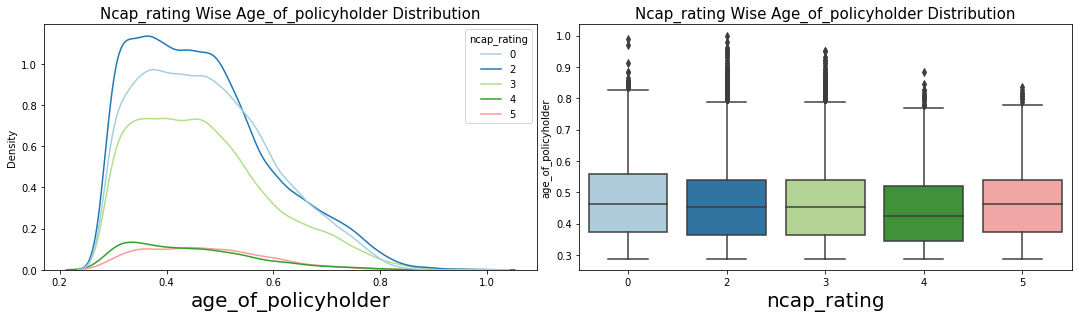

In [46]:
for i,col  in enumerate(categorical_columns[30:]): 
    _=side_by_side_plot(train,col,'age_of_policyholder',size=(15,4))